In [276]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

##### 1.Age
##### 2.Sex
##### 3.Chest pain type (4 values)
##### 4.Resting blood pressure
##### 5.Serum cholestoral in mg/dl
##### 6.Fasting blood sugar > 120 mg/dl
##### 7.Resting electrocardiographic results (values 0,1,2)
##### 8.Maximum heart rate achieved
##### 9.Exercise induced angina
##### 10.Oldpeak = ST depression induced by exercise relative to rest
##### 11.The slope of the peak exercise ST segment
##### 12.Number of major vessels (0-3) colored by flourosopy
##### 13.Thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
##### The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [277]:
data=pd.read_csv("C:/Users/Suleyman/Desktop/heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Let's look at the data set statistical information

In [278]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [279]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


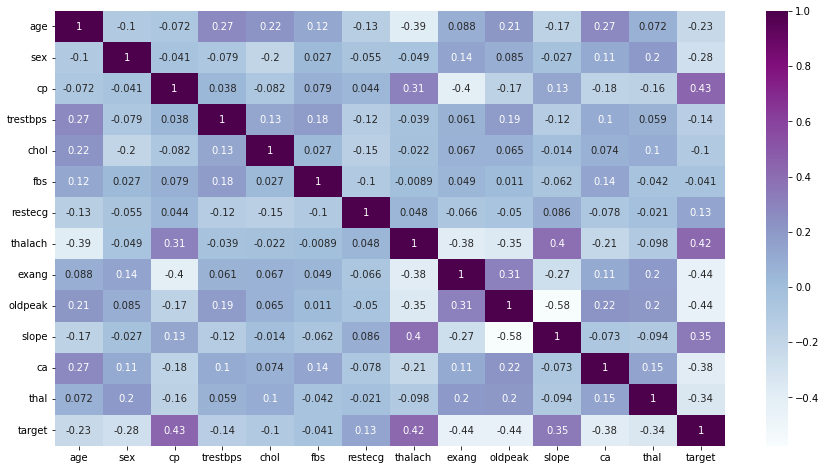

In [280]:
### Correlation information of variables
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap="BuPu",);

# Age Distribution

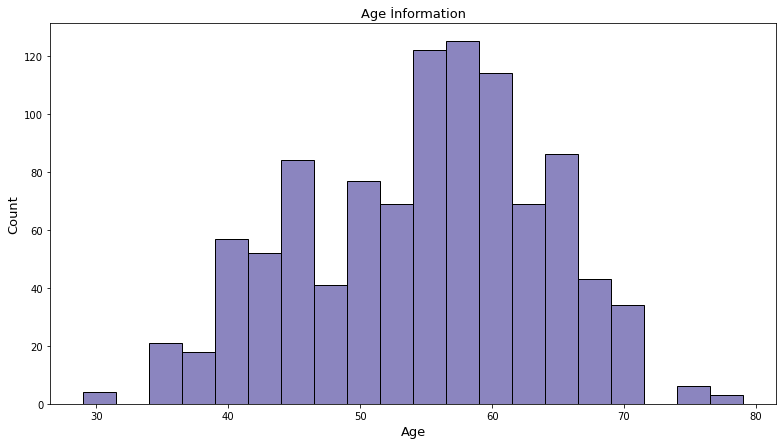

In [281]:
plt.figure(figsize=(13,7))
sns.histplot(data=data,x="age",color="#645CAA",binwidth=2.5,element="bars");
plt.title("Age İnformation",size=13)
plt.xlabel("Age",size=13);
plt.ylabel("Count",size=13);

### Age Distribution By Gender

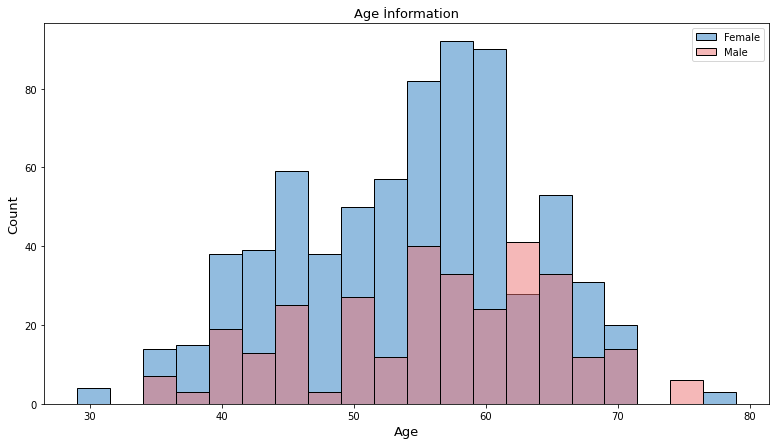

In [282]:
plt.figure(figsize=(13,7))
sns.histplot(data=data,x="age",hue="sex",palette=sns.color_palette(["#EC7272","#277BC0"]),binwidth=2.5,element="bars");
plt.legend(["Female","Male"])
plt.title("Age İnformation",size=13)
plt.xlabel("Age",size=13);
plt.ylabel("Count",size=13);
plt.show()

### Gender İnformation

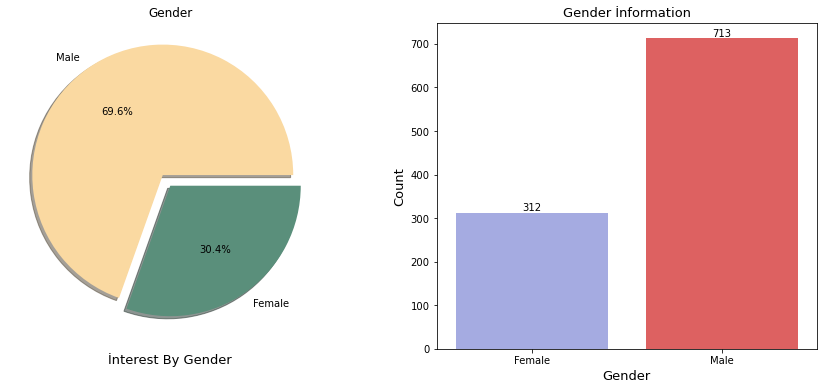

In [283]:
countgender=data[["sex"]].value_counts().reset_index(name="Count").replace({1:"Male",0:"Female"})
gender=countgender["sex"].tolist()
count=countgender["Count"].tolist()
#
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
explode=[0.1,0.0]
palette=sns.color_palette(["#FAD9A1","#5A8F7B"])
plt.pie(count,labels=gender,autopct="%1.1f%%",colors=palette,explode=explode,shadow=True)
plt.title("Gender")
plt.xlabel("İnterest By Gender",size=13)
#
plt.subplot(1,2,2)
ax=sns.countplot(data=data,x="sex",palette=sns.color_palette(["#9BA3EB","#F24C4C"]));
for i in ax.containers:
    ax.bar_label(i)
plt.xticks([0,1],["Female","Male"]);
plt.title("Gender İnformation",size=13)
plt.xlabel("Gender",size=13);
plt.ylabel("Count",size=13);
plt.show()

# Gender By Results

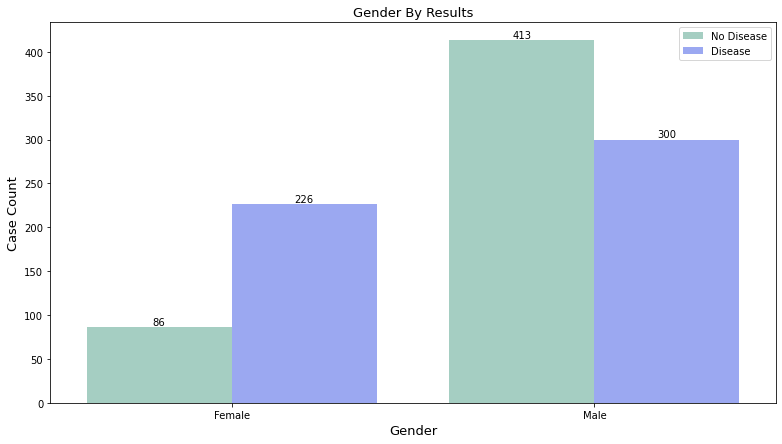

In [284]:
plt.figure(figsize=(13,7))
ax=sns.countplot(data=data,x="sex",hue="target",palette=sns.color_palette(["#9ED5C5","#8D9EFF"]))
for i in ax.containers:
    ax.bar_label(i)
plt.legend(["No Disease","Disease"])
plt.xticks([0,1],["Female","Male"])
plt.title("Gender By Results",size=13)
plt.xlabel("Gender",size=13)
plt.ylabel("Case Count",size=13)
plt.show()

# Chest Pain Type 

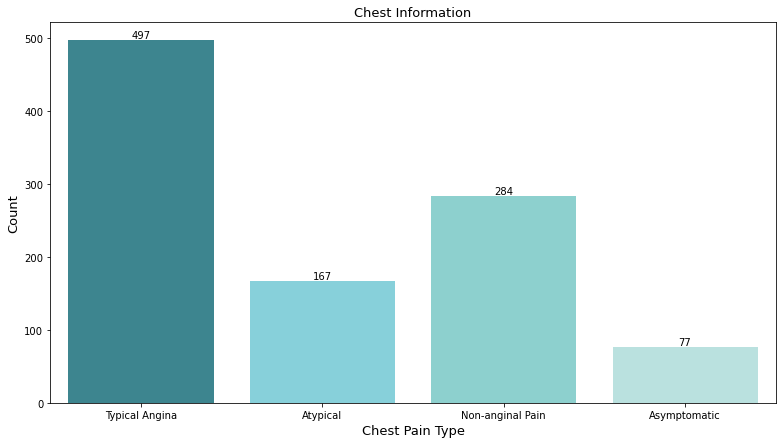

In [285]:
plt.figure(figsize=(13,7))
ax=sns.countplot(data=data,x="cp",palette=sns.color_palette(["#2F8F9D","#79DAE8","#82DBD8","#B3E8E5"]))
plt.xticks([0,1,2,3],["Typical Angina","Atypical","Non-anginal Pain","Asymptomatic"],size=10)
plt.title("Chest Information",size=13)
plt.xlabel("Chest Pain Type",size=13)
plt.ylabel("Count",size=13)
for i in ax.containers:
    ax.bar_label(i)

# Chest Pain By Results

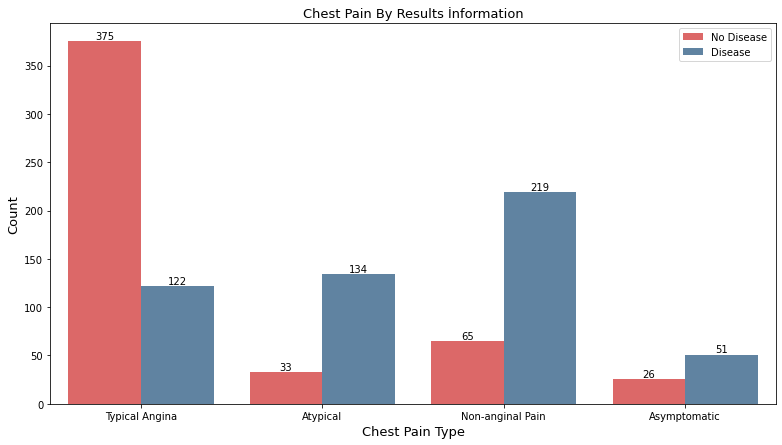

In [286]:
plt.figure(figsize=(13,7))
ax=sns.countplot(data=data,x="cp",hue="target",palette=sns.color_palette(["#F05454","#5584AC"]))
plt.legend(["No Disease","Disease"])
plt.xticks([0,1,2,3],["Typical Angina","Atypical","Non-anginal Pain","Asymptomatic"],size=10)
plt.title("Chest Pain By Results İnformation",size=13)
plt.xlabel("Chest Pain Type",size=13)
plt.ylabel("Count",size=13)
for i in ax.containers:
    ax.bar_label(i)

# Trestbps İnformation

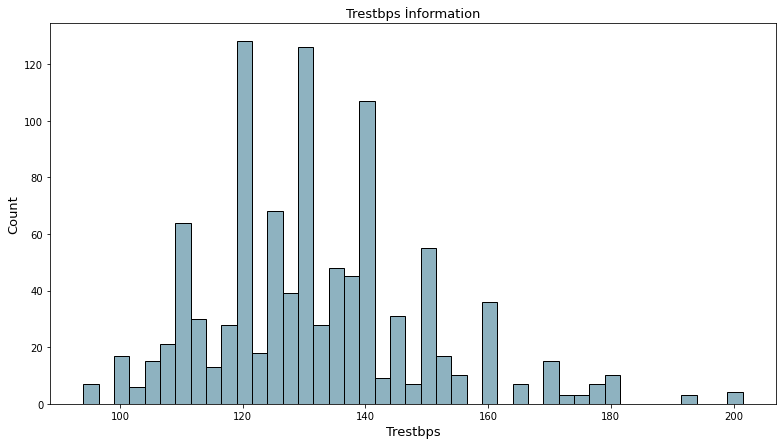

In [287]:
plt.figure(figsize=(13,7))
sns.histplot(data=data,x="trestbps",color="#6998AB",binwidth=2.5,element="bars");
plt.title("Trestbps İnformation",size=13)
plt.xlabel("Trestbps",size=13);
plt.ylabel("Count",size=13);

# Trestbps By Gender

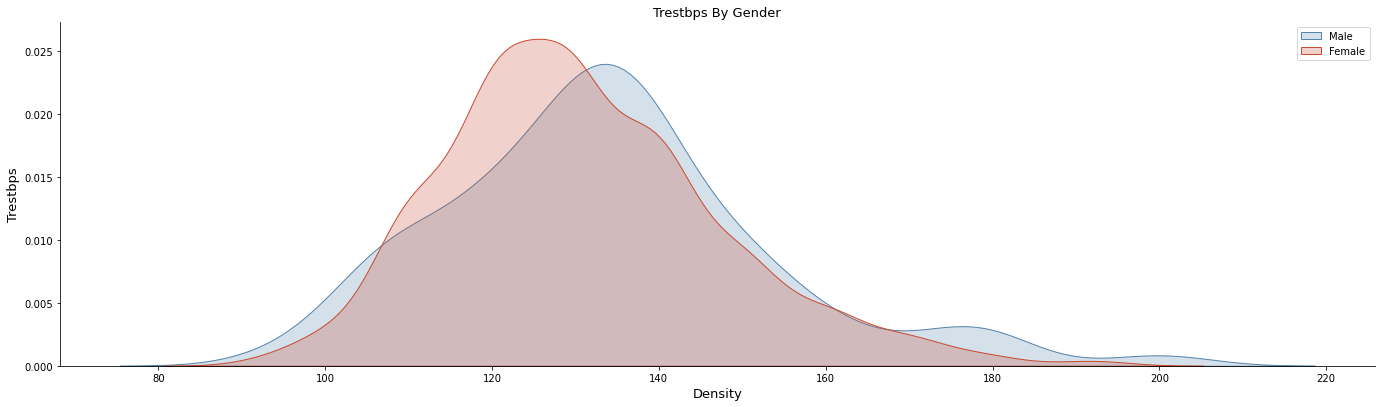

In [288]:
sns.FacetGrid(data=data,
                hue="sex",
                  height=5.5,
                    aspect=3.5,
                      palette=sns.color_palette(["#5584AC","#C84B31"])).map(sns.kdeplot,
                                                                                   "trestbps",
                                                                                       shade="True")
plt.legend(["Male","Female"])
plt.title("Trestbps By Gender",size=13)
plt.xlabel("Density",size=13)
plt.ylabel("Trestbps",size=13)
plt.show()

# Machine Learning Models

# Categorical Data 

In [289]:
cat_data=["sex","cp","fbs","restecg","exang","slope","ca","thal","target"]
value_data=["age","trestbps","chol","thalach","oldpeak"]

In [290]:
cat_data.remove("sex")
cat_data.remove("target")
data=pd.get_dummies(data,columns=data[cat_data].columns,drop_first=True)
data

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,164,0.0,1,1,0,0,...,1,0,1,0,0,0,0,0,1,0
1021,60,1,125,258,141,2.8,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
1022,47,1,110,275,118,1.0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
1023,50,0,110,254,159,0.0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


# Feature Scaling

In [291]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data[value_data]=sc.fit_transform(data[value_data])
data

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.268437,1,-0.377636,-0.659332,0.821321,-0.060888,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.158157,1,0.479107,-0.833861,0.255968,1.727137,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.716595,1,0.764688,-1.396233,-1.048692,1.301417,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.724079,1,0.936037,-0.833861,0.516900,-0.912329,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.834359,0,0.364875,0.930822,-1.874977,0.705408,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,0.479107,-0.484803,0.647366,-0.912329,1,1,0,0,...,1,0,1,0,0,0,0,0,1,0
1021,0.613800,1,-0.377636,0.232705,-0.352873,1.471705,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
1022,-0.819834,1,-1.234378,0.562371,-1.353113,-0.060888,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
1023,-0.488996,0,-1.234378,0.155137,0.429923,-0.912329,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


# Train Test Split

In [292]:
X=data.drop("target",axis=1)
y=data["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [293]:
def accuracy_(y,predict):
    accuracy=accuracy_score(y,predict)
    return accuracy
def cross_auc(model):
    auc=cross_val_score(model,X_train,y_train,cv=10).mean()
    return auc

In [294]:
models=pd.DataFrame(columns=["Model","Accuracy Score","Cross Validation"])

# Logistic Regression

In [295]:
from sklearn.linear_model import LogisticRegression 
log_model=LogisticRegression().fit(X_train,y_train)
pred=log_model.predict(X_test)
log_aucscore=accuracy_(y_test,pred)
log_cross_validation=cross_auc(log_model)
print("-"*60)
print("Logistic Regression Accuracy Score: ",log_aucscore)
print("-"*60)
print("Logistic Regression Cross Val Score: ",log_cross_validation)
new_info={"Model":"Logistic Regresion","Accuracy Score":log_aucscore,"Cross Validation":log_cross_validation}
models =models.append(new_info,ignore_index=True)

------------------------------------------------------------
Logistic Regression Accuracy Score:  0.7976653696498055
------------------------------------------------------------
Logistic Regression Cross Val Score:  0.8774948735475052


### Model validation must be done because external hyperparameter cannot be made in Logistic Regression.
### In the output of the "Proba", the left side is 0 and the right side is 1

In [296]:
print(log_model.predict(X_test)[:10])
print("-"*30)
print("Left side 0 if right side 1")
print("-"*30)
print(log_model.predict_proba(X_test)[:10])

[1 1 0 1 0 1 0 0 1 0]
------------------------------
Left side 0 if right side 1
------------------------------
[[0.01483803 0.98516197]
 [0.03155056 0.96844944]
 [0.99394682 0.00605318]
 [0.01819288 0.98180712]
 [0.96019133 0.03980867]
 [0.23267352 0.76732648]
 [0.96472947 0.03527053]
 [0.99601581 0.00398419]
 [0.24523081 0.75476919]
 [0.87218433 0.12781567]]


#### Conducting the verification process with 1

In [297]:
y_probs=log_model.predict_proba(X_test) 
y_probs=y_probs[:,1]
#
y_pred=[1 if i >0.5 else 0 for i in y_probs]
print(y_pred[:10])
print("-"*30)
print(y_probs[:10])

[1, 1, 0, 1, 0, 1, 0, 0, 1, 0]
------------------------------
[0.98516197 0.96844944 0.00605318 0.98180712 0.03980867 0.76732648
 0.03527053 0.00398419 0.75476919 0.12781567]


# ROC 

##### The ROC curve emerges as the ratio of sensitivity to precision in binary classification systems where the discrimination threshold differs.

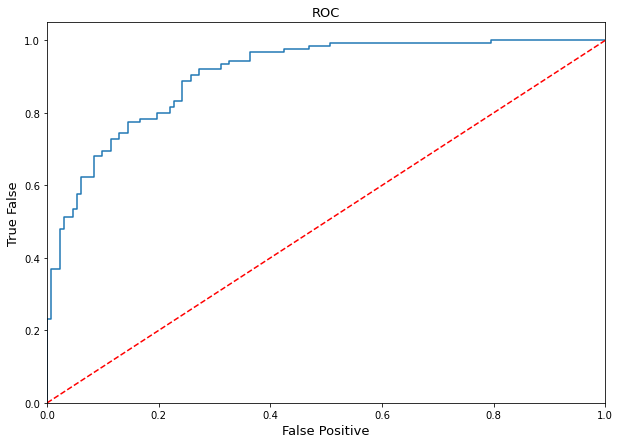

In [298]:
log_roc_auc=roc_auc_score(y_test,log_model.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,log_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,label='AUC(area=%0.2f)'%log_roc_auc)
plt.plot([0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim(0.0,1.05)
plt.xlabel("False Positive",size=13)
plt.ylabel("True False",size=13)
plt.title("ROC",size=13)
plt.show()

# Naive Bayes

In [299]:
from sklearn.naive_bayes import GaussianNB
gaus_model=GaussianNB().fit(X_train,y_train)
pred=gaus_model.predict(X_test)
gaus_aucscore=accuracy_(y_test,pred)
gaus_cross_validation=cross_auc(gaus_model)
print("-"*60)
print("Naive Bayes Regression Accuracy Score: ",gaus_aucscore)
print("-"*60)
print("Naive Bayes Regression Cross Val Score: ",gaus_cross_validation)
new_info={"Model":"Naive Bayes","Accuracy Score":gaus_aucscore,"Cross Validation":gaus_cross_validation}
models =models.append(new_info,ignore_index=True)

------------------------------------------------------------
Naive Bayes Regression Accuracy Score:  0.7937743190661478
------------------------------------------------------------
Naive Bayes Regression Cross Val Score:  0.8410457963089542


### Model validation 

In [300]:
print(gaus_model.predict(X_test)[:10])
print("-"*30)
print("Left side 0 if right side 1")
print("-"*30)
print(gaus_model.predict_proba(X_test)[:10])

[1 1 0 1 0 1 0 0 0 0]
------------------------------
Left side 0 if right side 1
------------------------------
[[3.40982066e-05 9.99965902e-01]
 [1.48206591e-03 9.98517934e-01]
 [9.99978499e-01 2.15014862e-05]
 [1.95303416e-08 9.99999980e-01]
 [9.99999301e-01 6.98730054e-07]
 [1.12762180e-04 9.99887238e-01]
 [9.99438642e-01 5.61357620e-04]
 [1.00000000e+00 1.05262994e-10]
 [6.60810219e-01 3.39189781e-01]
 [9.99926090e-01 7.39103059e-05]]


#### Conducting the verification process with 1

In [301]:
y_probs=gaus_model.predict_proba(X_test)
y_probs=y_probs[:,1]
#
y_pred=[1 if i >0.5 else 1 for i in y_probs]
print(y_pred[:10])
print("-"*30)
print(y_probs[:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
------------------------------
[9.99965902e-01 9.98517934e-01 2.15014862e-05 9.99999980e-01
 6.98730054e-07 9.99887238e-01 5.61357620e-04 1.05262994e-10
 3.39189781e-01 7.39103059e-05]


# ROC 

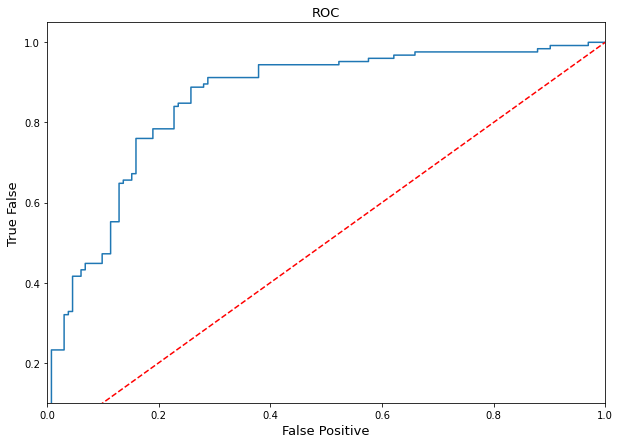

In [302]:
gaus_roc_model=roc_auc_score(y_test,gaus_model.predict(X_test))
fpr,tpr,threshold=roc_curve(y_test,gaus_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,label='AUC(area=%0.2f)'%gaus_roc_model)
plt.plot([0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.1,1.05])
plt.xlabel("False Positive",size=13)
plt.ylabel("True False",size=13)
plt.title("ROC",size=13)
plt.show()

# KNN

In [303]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier().fit(X_train,y_train)
pred=knn_model.predict(X_test)
knn_aucscore=accuracy_(y_test,pred)
knn_cross_validation=cross_auc(knn_model)
print("-"*60)
print("KNN Accuracy Score: ",knn_aucscore)
print("-"*60)
print("KNN Cross Val Score: ",knn_cross_validation)
new_info={"Model":"KNN","Accuracy Score":knn_aucscore,"Cross Validation":knn_cross_validation}
models =models.append(new_info,ignore_index=True)

------------------------------------------------------------
KNN Accuracy Score:  0.8015564202334631
------------------------------------------------------------
KNN Cross Val Score:  0.8697026657552973


# SVC

In [304]:
from sklearn.svm import SVC
svc_model=SVC().fit(X_train,y_train)
pred=svc_model.predict(X_test)
svc_aucscore=accuracy_(y_test,pred)
svc_cross_validation=cross_auc(svc_model)
print("-"*60)
print("SVC Accuracy Score: ",svc_aucscore)
print("-"*60)
print("SVC Cross Val Score: ",svc_cross_validation)
new_info={"Model":"SVC","Accuracy Score":svc_aucscore,"Cross Validation":svc_cross_validation}
models =models.append(new_info,ignore_index=True)

------------------------------------------------------------
SVC Accuracy Score:  0.867704280155642
------------------------------------------------------------
SVC Cross Val Score:  0.9205228981544771


# MLP

In [305]:
from sklearn.neural_network import MLPClassifier
mlp_model=MLPClassifier().fit(X_train,y_train)
pred=mlp_model.predict(X_test)
mlp_aucscore=accuracy_(y_test,pred)
mlp_cross_validation=cross_auc(mlp_model)
print("-"*60)
print("MLP Accuracy Score: ",mlp_aucscore)
print("-"*60)
print("MLP Cross Val Score: ",mlp_cross_validation)
new_info={"Model":"MLP","Accuracy Score":mlp_aucscore,"Cross Validation":mlp_cross_validation}
models =models.append(new_info,ignore_index=True)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Opti

------------------------------------------------------------
MLP Accuracy Score:  0.933852140077821
------------------------------------------------------------
MLP Cross Val Score:  0.9452153110047847


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Decision Tree Classifier

In [306]:
from sklearn.tree import DecisionTreeClassifier
decision_model=DecisionTreeClassifier().fit(X_train,y_train)
pred=decision_model.predict(X_test)
decision_aucscore=accuracy_(y_test,pred)
decision_cross_validation=cross_auc(decision_model)
print("-"*60)
print("Decision Tree Accuracy Score: ",decision_aucscore)
print("-"*60)
print("Decision Tree Cross Val Score: ",decision_cross_validation)
new_info={"Model":"Decision Tree ","Accuracy Score":decision_aucscore,"Cross Validation":decision_cross_validation}
models =models.append(new_info,ignore_index=True)

------------------------------------------------------------
Decision Tree Accuracy Score:  0.9649805447470817
------------------------------------------------------------
Decision Tree Cross Val Score:  0.9830485304169512


# Random Forest Classifier

In [307]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model=RandomForestClassifier().fit(X_train,y_train)
pred=randomforest_model.predict(X_test)
randomforest_aucscore=accuracy_(y_test,pred)
randomforest_cross_validation=cross_auc(randomforest_model)
print("-"*60)
print("Random Forest Accuracy Score: ",randomforest_aucscore)
print("-"*60)
print("Random Forest Cross Val Score: ",randomforest_cross_validation)
new_info={"Model":"Random Forest","Accuracy Score":randomforest_aucscore,"Cross Validation":randomforest_cross_validation}
models =models.append(new_info,ignore_index=True)

------------------------------------------------------------
Random Forest Accuracy Score:  0.9883268482490273
------------------------------------------------------------
Random Forest Cross Val Score:  0.9869446343130553


# Gradient Boosting Classifier

In [308]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_model=GradientBoostingClassifier().fit(X_train,y_train)
pred=gradient_model.predict(X_test)
gradient_aucscore=accuracy_(y_test,pred)
gradient_cross_validation=cross_auc(gradient_model)
print("-"*60)
print("Gradient Accuracy Score: ",gradient_aucscore)
print("-"*60)
print("Gradient Cross Val Score: ",gradient_cross_validation)
new_info={"Model":" Gradient","Accuracy Score":gradient_aucscore,"Cross Validation":gradient_cross_validation}
models =models.append(new_info,ignore_index=True)

------------------------------------------------------------
Gradient Accuracy Score:  0.953307392996109
------------------------------------------------------------
Gradient Cross Val Score:  0.9608851674641148


# XGBoost

In [309]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier().fit(X_train,y_train)
pred=xgb_model.predict(X_test)
xgb_aucscore=accuracy_(y_test,pred)
xgb_cross_validation=cross_auc(xgb_model)
print("-"*60)
print("XGBoost Accuracy Score: ",xgb_aucscore)
print("-"*60)
print("XGBoost Cross Val Score: ",xgb_cross_validation)
new_info={"Model":" XGBoost","Accuracy Score":xgb_aucscore,"Cross Validation":xgb_cross_validation}
models =models.append(new_info,ignore_index=True)

------------------------------------------------------------
XGBoost Accuracy Score:  0.9649805447470817
------------------------------------------------------------
XGBoost Cross Val Score:  0.985645933014354


# LightGBM 

In [310]:
from lightgbm import LGBMClassifier
light_model=LGBMClassifier().fit(X_train,y_train)
pred=xgb_model.predict(X_test)
light_aucscore=accuracy_(y_test,pred)
light_cross_validation=cross_auc(light_model)
print("-"*60)
print("LightGBM Accuracy Score: ",light_aucscore)
print("-"*60)
print("LightGBM Cross Val Score: ",light_cross_validation)
new_info={"Model":" LightGBM","Accuracy Score":light_aucscore,"Cross Validation":light_cross_validation}
models =models.append(new_info,ignore_index=True)

------------------------------------------------------------
LightGBM Accuracy Score:  0.9649805447470817
------------------------------------------------------------
LightGBM Cross Val Score:  0.9843301435406697


# CatBoost

In [311]:
from catboost import CatBoostClassifier
catboost_model=CatBoostClassifier().fit(X_train,y_train)
pred=catboost_model.predict(X_test)
catboost_aucscore=accuracy_(y_test,pred)
catboost_cross_validation=cross_auc(catboost_model)
print("-"*60)
print("CatBoost Accuracy Score: ",catboost_aucscore)
print("-"*60)
print("CatBoost Cross Val Score: ",catboost_cross_validation)
new_info={"Model":" CatBoost","Accuracy Score":catboost_aucscore,"Cross Validation":catboost_cross_validation}
models =models.append(new_info,ignore_index=True)

Learning rate set to 0.009204
0:	learn: 0.6868700	total: 2.31ms	remaining: 2.31s
1:	learn: 0.6784716	total: 5.47ms	remaining: 2.73s
2:	learn: 0.6712055	total: 7.96ms	remaining: 2.65s
3:	learn: 0.6649375	total: 10.4ms	remaining: 2.58s
4:	learn: 0.6575985	total: 13.1ms	remaining: 2.61s
5:	learn: 0.6513459	total: 15.6ms	remaining: 2.58s
6:	learn: 0.6454385	total: 17.9ms	remaining: 2.54s
7:	learn: 0.6371771	total: 20.5ms	remaining: 2.55s
8:	learn: 0.6308575	total: 22.9ms	remaining: 2.53s
9:	learn: 0.6244784	total: 25.3ms	remaining: 2.5s
10:	learn: 0.6191207	total: 27.7ms	remaining: 2.49s
11:	learn: 0.6120430	total: 30ms	remaining: 2.47s
12:	learn: 0.6064153	total: 32.4ms	remaining: 2.46s
13:	learn: 0.6013722	total: 35.6ms	remaining: 2.51s
14:	learn: 0.5965840	total: 38ms	remaining: 2.5s
15:	learn: 0.5911131	total: 40.3ms	remaining: 2.48s
16:	learn: 0.5842729	total: 42.7ms	remaining: 2.47s
17:	learn: 0.5779477	total: 45.1ms	remaining: 2.46s
18:	learn: 0.5728718	total: 47.5ms	remaining: 2.45

219:	learn: 0.1921052	total: 513ms	remaining: 1.82s
220:	learn: 0.1913913	total: 516ms	remaining: 1.82s
221:	learn: 0.1908460	total: 519ms	remaining: 1.82s
222:	learn: 0.1898934	total: 522ms	remaining: 1.82s
223:	learn: 0.1894503	total: 524ms	remaining: 1.82s
224:	learn: 0.1890519	total: 527ms	remaining: 1.81s
225:	learn: 0.1885003	total: 529ms	remaining: 1.81s
226:	learn: 0.1882712	total: 532ms	remaining: 1.81s
227:	learn: 0.1872280	total: 535ms	remaining: 1.81s
228:	learn: 0.1866973	total: 538ms	remaining: 1.81s
229:	learn: 0.1863958	total: 540ms	remaining: 1.81s
230:	learn: 0.1859103	total: 544ms	remaining: 1.81s
231:	learn: 0.1853831	total: 546ms	remaining: 1.81s
232:	learn: 0.1846563	total: 549ms	remaining: 1.81s
233:	learn: 0.1840980	total: 552ms	remaining: 1.81s
234:	learn: 0.1834121	total: 554ms	remaining: 1.8s
235:	learn: 0.1827495	total: 557ms	remaining: 1.8s
236:	learn: 0.1822062	total: 559ms	remaining: 1.8s
237:	learn: 0.1814274	total: 561ms	remaining: 1.79s
238:	learn: 0.1

445:	learn: 0.1052341	total: 1.03s	remaining: 1.28s
446:	learn: 0.1050120	total: 1.04s	remaining: 1.28s
447:	learn: 0.1047749	total: 1.04s	remaining: 1.28s
448:	learn: 0.1045714	total: 1.04s	remaining: 1.28s
449:	learn: 0.1042741	total: 1.04s	remaining: 1.28s
450:	learn: 0.1041602	total: 1.05s	remaining: 1.27s
451:	learn: 0.1038284	total: 1.05s	remaining: 1.27s
452:	learn: 0.1035761	total: 1.05s	remaining: 1.27s
453:	learn: 0.1033011	total: 1.05s	remaining: 1.27s
454:	learn: 0.1031123	total: 1.06s	remaining: 1.27s
455:	learn: 0.1027823	total: 1.06s	remaining: 1.27s
456:	learn: 0.1026079	total: 1.06s	remaining: 1.26s
457:	learn: 0.1023277	total: 1.07s	remaining: 1.26s
458:	learn: 0.1021179	total: 1.07s	remaining: 1.26s
459:	learn: 0.1019619	total: 1.07s	remaining: 1.26s
460:	learn: 0.1017718	total: 1.07s	remaining: 1.25s
461:	learn: 0.1015801	total: 1.07s	remaining: 1.25s
462:	learn: 0.1012751	total: 1.08s	remaining: 1.25s
463:	learn: 0.1011367	total: 1.08s	remaining: 1.25s
464:	learn: 

605:	learn: 0.0755265	total: 1.39s	remaining: 906ms
606:	learn: 0.0753200	total: 1.4s	remaining: 904ms
607:	learn: 0.0751955	total: 1.4s	remaining: 902ms
608:	learn: 0.0751194	total: 1.4s	remaining: 900ms
609:	learn: 0.0750466	total: 1.4s	remaining: 898ms
610:	learn: 0.0748841	total: 1.41s	remaining: 896ms
611:	learn: 0.0746275	total: 1.41s	remaining: 894ms
612:	learn: 0.0743788	total: 1.41s	remaining: 892ms
613:	learn: 0.0742597	total: 1.42s	remaining: 890ms
614:	learn: 0.0741095	total: 1.42s	remaining: 887ms
615:	learn: 0.0739946	total: 1.42s	remaining: 885ms
616:	learn: 0.0738533	total: 1.42s	remaining: 883ms
617:	learn: 0.0736424	total: 1.42s	remaining: 880ms
618:	learn: 0.0735380	total: 1.43s	remaining: 878ms
619:	learn: 0.0733500	total: 1.43s	remaining: 876ms
620:	learn: 0.0731958	total: 1.43s	remaining: 873ms
621:	learn: 0.0730092	total: 1.43s	remaining: 871ms
622:	learn: 0.0728434	total: 1.43s	remaining: 868ms
623:	learn: 0.0726580	total: 1.44s	remaining: 866ms
624:	learn: 0.07

826:	learn: 0.0497050	total: 1.92s	remaining: 402ms
827:	learn: 0.0496169	total: 1.93s	remaining: 400ms
828:	learn: 0.0495315	total: 1.93s	remaining: 398ms
829:	learn: 0.0494825	total: 1.93s	remaining: 396ms
830:	learn: 0.0494228	total: 1.93s	remaining: 393ms
831:	learn: 0.0493069	total: 1.94s	remaining: 391ms
832:	learn: 0.0492598	total: 1.94s	remaining: 389ms
833:	learn: 0.0492179	total: 1.94s	remaining: 386ms
834:	learn: 0.0491530	total: 1.94s	remaining: 384ms
835:	learn: 0.0490330	total: 1.95s	remaining: 382ms
836:	learn: 0.0489576	total: 1.95s	remaining: 379ms
837:	learn: 0.0488971	total: 1.95s	remaining: 377ms
838:	learn: 0.0487892	total: 1.95s	remaining: 375ms
839:	learn: 0.0487277	total: 1.96s	remaining: 373ms
840:	learn: 0.0486556	total: 1.96s	remaining: 370ms
841:	learn: 0.0486294	total: 1.96s	remaining: 368ms
842:	learn: 0.0485706	total: 1.96s	remaining: 365ms
843:	learn: 0.0484859	total: 1.96s	remaining: 363ms
844:	learn: 0.0484205	total: 1.97s	remaining: 361ms
845:	learn: 

29:	learn: 0.5267007	total: 64.3ms	remaining: 2.08s
30:	learn: 0.5218986	total: 66.8ms	remaining: 2.09s
31:	learn: 0.5181555	total: 69.5ms	remaining: 2.1s
32:	learn: 0.5130005	total: 71.9ms	remaining: 2.1s
33:	learn: 0.5084441	total: 74.4ms	remaining: 2.11s
34:	learn: 0.5044569	total: 77ms	remaining: 2.12s
35:	learn: 0.5009032	total: 79.6ms	remaining: 2.13s
36:	learn: 0.4959905	total: 82.6ms	remaining: 2.15s
37:	learn: 0.4924977	total: 85.3ms	remaining: 2.16s
38:	learn: 0.4890813	total: 88ms	remaining: 2.17s
39:	learn: 0.4861915	total: 90.5ms	remaining: 2.17s
40:	learn: 0.4828869	total: 93ms	remaining: 2.17s
41:	learn: 0.4792615	total: 95.3ms	remaining: 2.17s
42:	learn: 0.4757356	total: 97.8ms	remaining: 2.18s
43:	learn: 0.4726746	total: 99.9ms	remaining: 2.17s
44:	learn: 0.4690027	total: 102ms	remaining: 2.16s
45:	learn: 0.4658767	total: 104ms	remaining: 2.16s
46:	learn: 0.4621476	total: 106ms	remaining: 2.15s
47:	learn: 0.4586227	total: 108ms	remaining: 2.15s
48:	learn: 0.4558834	tot

256:	learn: 0.1851219	total: 583ms	remaining: 1.69s
257:	learn: 0.1847101	total: 586ms	remaining: 1.69s
258:	learn: 0.1840914	total: 589ms	remaining: 1.68s
259:	learn: 0.1837032	total: 591ms	remaining: 1.68s
260:	learn: 0.1832657	total: 594ms	remaining: 1.68s
261:	learn: 0.1828325	total: 597ms	remaining: 1.68s
262:	learn: 0.1822690	total: 599ms	remaining: 1.68s
263:	learn: 0.1817817	total: 602ms	remaining: 1.68s
264:	learn: 0.1810008	total: 605ms	remaining: 1.68s
265:	learn: 0.1805010	total: 607ms	remaining: 1.68s
266:	learn: 0.1799834	total: 610ms	remaining: 1.67s
267:	learn: 0.1794494	total: 612ms	remaining: 1.67s
268:	learn: 0.1788777	total: 614ms	remaining: 1.67s
269:	learn: 0.1785915	total: 616ms	remaining: 1.67s
270:	learn: 0.1781724	total: 618ms	remaining: 1.66s
271:	learn: 0.1773334	total: 620ms	remaining: 1.66s
272:	learn: 0.1768240	total: 623ms	remaining: 1.66s
273:	learn: 0.1764930	total: 625ms	remaining: 1.66s
274:	learn: 0.1759062	total: 627ms	remaining: 1.65s
275:	learn: 

490:	learn: 0.1060037	total: 1.11s	remaining: 1.15s
491:	learn: 0.1058225	total: 1.11s	remaining: 1.15s
492:	learn: 0.1056830	total: 1.11s	remaining: 1.14s
493:	learn: 0.1055548	total: 1.11s	remaining: 1.14s
494:	learn: 0.1052845	total: 1.12s	remaining: 1.14s
495:	learn: 0.1050812	total: 1.12s	remaining: 1.14s
496:	learn: 0.1048183	total: 1.12s	remaining: 1.14s
497:	learn: 0.1045070	total: 1.13s	remaining: 1.13s
498:	learn: 0.1042713	total: 1.13s	remaining: 1.13s
499:	learn: 0.1040443	total: 1.13s	remaining: 1.13s
500:	learn: 0.1038533	total: 1.13s	remaining: 1.13s
501:	learn: 0.1035524	total: 1.14s	remaining: 1.13s
502:	learn: 0.1032844	total: 1.14s	remaining: 1.12s
503:	learn: 0.1030247	total: 1.14s	remaining: 1.12s
504:	learn: 0.1027713	total: 1.14s	remaining: 1.12s
505:	learn: 0.1025679	total: 1.14s	remaining: 1.12s
506:	learn: 0.1023478	total: 1.15s	remaining: 1.11s
507:	learn: 0.1021686	total: 1.15s	remaining: 1.11s
508:	learn: 0.1020250	total: 1.15s	remaining: 1.11s
509:	learn: 

699:	learn: 0.0702442	total: 1.61s	remaining: 692ms
700:	learn: 0.0701272	total: 1.62s	remaining: 690ms
701:	learn: 0.0699984	total: 1.62s	remaining: 688ms
702:	learn: 0.0698990	total: 1.62s	remaining: 686ms
703:	learn: 0.0698075	total: 1.63s	remaining: 684ms
704:	learn: 0.0696564	total: 1.63s	remaining: 682ms
705:	learn: 0.0694656	total: 1.63s	remaining: 680ms
706:	learn: 0.0692713	total: 1.64s	remaining: 678ms
707:	learn: 0.0691535	total: 1.64s	remaining: 676ms
708:	learn: 0.0689919	total: 1.64s	remaining: 674ms
709:	learn: 0.0688398	total: 1.64s	remaining: 672ms
710:	learn: 0.0687306	total: 1.65s	remaining: 669ms
711:	learn: 0.0686439	total: 1.65s	remaining: 667ms
712:	learn: 0.0685922	total: 1.65s	remaining: 665ms
713:	learn: 0.0684830	total: 1.65s	remaining: 663ms
714:	learn: 0.0683546	total: 1.66s	remaining: 661ms
715:	learn: 0.0681873	total: 1.66s	remaining: 658ms
716:	learn: 0.0680241	total: 1.66s	remaining: 656ms
717:	learn: 0.0678932	total: 1.66s	remaining: 654ms
718:	learn: 

876:	learn: 0.0514447	total: 2.13s	remaining: 299ms
877:	learn: 0.0514201	total: 2.14s	remaining: 297ms
878:	learn: 0.0513146	total: 2.14s	remaining: 295ms
879:	learn: 0.0512209	total: 2.14s	remaining: 292ms
880:	learn: 0.0511573	total: 2.15s	remaining: 290ms
881:	learn: 0.0510877	total: 2.15s	remaining: 288ms
882:	learn: 0.0509608	total: 2.15s	remaining: 285ms
883:	learn: 0.0508452	total: 2.15s	remaining: 283ms
884:	learn: 0.0507693	total: 2.16s	remaining: 281ms
885:	learn: 0.0506962	total: 2.16s	remaining: 278ms
886:	learn: 0.0506101	total: 2.16s	remaining: 276ms
887:	learn: 0.0505113	total: 2.17s	remaining: 273ms
888:	learn: 0.0504188	total: 2.17s	remaining: 271ms
889:	learn: 0.0503287	total: 2.17s	remaining: 269ms
890:	learn: 0.0502014	total: 2.17s	remaining: 266ms
891:	learn: 0.0500718	total: 2.18s	remaining: 264ms
892:	learn: 0.0500032	total: 2.18s	remaining: 261ms
893:	learn: 0.0499261	total: 2.18s	remaining: 259ms
894:	learn: 0.0498268	total: 2.19s	remaining: 257ms
895:	learn: 

66:	learn: 0.3993673	total: 164ms	remaining: 2.29s
67:	learn: 0.3972483	total: 167ms	remaining: 2.29s
68:	learn: 0.3948478	total: 169ms	remaining: 2.28s
69:	learn: 0.3925439	total: 171ms	remaining: 2.28s
70:	learn: 0.3899836	total: 174ms	remaining: 2.28s
71:	learn: 0.3878225	total: 176ms	remaining: 2.27s
72:	learn: 0.3852104	total: 179ms	remaining: 2.27s
73:	learn: 0.3832739	total: 182ms	remaining: 2.27s
74:	learn: 0.3814203	total: 185ms	remaining: 2.28s
75:	learn: 0.3799443	total: 188ms	remaining: 2.28s
76:	learn: 0.3777840	total: 190ms	remaining: 2.28s
77:	learn: 0.3757348	total: 193ms	remaining: 2.28s
78:	learn: 0.3736707	total: 195ms	remaining: 2.27s
79:	learn: 0.3718091	total: 197ms	remaining: 2.27s
80:	learn: 0.3695956	total: 200ms	remaining: 2.27s
81:	learn: 0.3668461	total: 202ms	remaining: 2.26s
82:	learn: 0.3647256	total: 204ms	remaining: 2.26s
83:	learn: 0.3621667	total: 206ms	remaining: 2.25s
84:	learn: 0.3606601	total: 209ms	remaining: 2.25s
85:	learn: 0.3587075	total: 211

267:	learn: 0.1789781	total: 681ms	remaining: 1.86s
268:	learn: 0.1785126	total: 684ms	remaining: 1.86s
269:	learn: 0.1782175	total: 686ms	remaining: 1.85s
270:	learn: 0.1777299	total: 688ms	remaining: 1.85s
271:	learn: 0.1770188	total: 691ms	remaining: 1.85s
272:	learn: 0.1764597	total: 693ms	remaining: 1.85s
273:	learn: 0.1759838	total: 696ms	remaining: 1.84s
274:	learn: 0.1752799	total: 699ms	remaining: 1.84s
275:	learn: 0.1749419	total: 702ms	remaining: 1.84s
276:	learn: 0.1745734	total: 705ms	remaining: 1.84s
277:	learn: 0.1739577	total: 707ms	remaining: 1.84s
278:	learn: 0.1734925	total: 710ms	remaining: 1.83s
279:	learn: 0.1729290	total: 713ms	remaining: 1.83s
280:	learn: 0.1724189	total: 715ms	remaining: 1.83s
281:	learn: 0.1718185	total: 718ms	remaining: 1.83s
282:	learn: 0.1714933	total: 720ms	remaining: 1.82s
283:	learn: 0.1709126	total: 723ms	remaining: 1.82s
284:	learn: 0.1705219	total: 726ms	remaining: 1.82s
285:	learn: 0.1701625	total: 728ms	remaining: 1.82s
286:	learn: 

477:	learn: 0.1086625	total: 1.2s	remaining: 1.31s
478:	learn: 0.1083496	total: 1.2s	remaining: 1.31s
479:	learn: 0.1082658	total: 1.21s	remaining: 1.31s
480:	learn: 0.1078739	total: 1.21s	remaining: 1.31s
481:	learn: 0.1077262	total: 1.21s	remaining: 1.3s
482:	learn: 0.1075095	total: 1.22s	remaining: 1.3s
483:	learn: 0.1072696	total: 1.22s	remaining: 1.3s
484:	learn: 0.1071051	total: 1.23s	remaining: 1.3s
485:	learn: 0.1068304	total: 1.23s	remaining: 1.3s
486:	learn: 0.1065577	total: 1.23s	remaining: 1.3s
487:	learn: 0.1064037	total: 1.24s	remaining: 1.3s
488:	learn: 0.1061956	total: 1.24s	remaining: 1.3s
489:	learn: 0.1059903	total: 1.24s	remaining: 1.29s
490:	learn: 0.1058337	total: 1.25s	remaining: 1.29s
491:	learn: 0.1056102	total: 1.25s	remaining: 1.29s
492:	learn: 0.1054694	total: 1.26s	remaining: 1.29s
493:	learn: 0.1051914	total: 1.26s	remaining: 1.29s
494:	learn: 0.1049507	total: 1.26s	remaining: 1.29s
495:	learn: 0.1047467	total: 1.27s	remaining: 1.29s
496:	learn: 0.1045027	

711:	learn: 0.0703639	total: 1.91s	remaining: 771ms
712:	learn: 0.0702098	total: 1.91s	remaining: 768ms
713:	learn: 0.0700945	total: 1.91s	remaining: 766ms
714:	learn: 0.0699951	total: 1.91s	remaining: 763ms
715:	learn: 0.0698595	total: 1.92s	remaining: 760ms
716:	learn: 0.0697338	total: 1.92s	remaining: 757ms
717:	learn: 0.0695463	total: 1.92s	remaining: 755ms
718:	learn: 0.0694126	total: 1.92s	remaining: 752ms
719:	learn: 0.0692642	total: 1.93s	remaining: 749ms
720:	learn: 0.0691874	total: 1.93s	remaining: 747ms
721:	learn: 0.0690765	total: 1.93s	remaining: 744ms
722:	learn: 0.0689520	total: 1.93s	remaining: 741ms
723:	learn: 0.0688882	total: 1.94s	remaining: 738ms
724:	learn: 0.0687518	total: 1.94s	remaining: 735ms
725:	learn: 0.0686852	total: 1.94s	remaining: 732ms
726:	learn: 0.0685172	total: 1.94s	remaining: 730ms
727:	learn: 0.0683205	total: 1.94s	remaining: 727ms
728:	learn: 0.0681659	total: 1.95s	remaining: 724ms
729:	learn: 0.0680530	total: 1.95s	remaining: 721ms
730:	learn: 

872:	learn: 0.0529007	total: 2.26s	remaining: 329ms
873:	learn: 0.0528338	total: 2.26s	remaining: 326ms
874:	learn: 0.0527690	total: 2.26s	remaining: 323ms
875:	learn: 0.0527212	total: 2.27s	remaining: 321ms
876:	learn: 0.0526435	total: 2.27s	remaining: 318ms
877:	learn: 0.0525325	total: 2.27s	remaining: 316ms
878:	learn: 0.0524137	total: 2.27s	remaining: 313ms
879:	learn: 0.0522895	total: 2.28s	remaining: 311ms
880:	learn: 0.0521918	total: 2.28s	remaining: 308ms
881:	learn: 0.0521582	total: 2.28s	remaining: 305ms
882:	learn: 0.0521083	total: 2.28s	remaining: 303ms
883:	learn: 0.0519907	total: 2.29s	remaining: 300ms
884:	learn: 0.0519109	total: 2.29s	remaining: 297ms
885:	learn: 0.0518193	total: 2.29s	remaining: 295ms
886:	learn: 0.0517360	total: 2.29s	remaining: 292ms
887:	learn: 0.0516012	total: 2.3s	remaining: 290ms
888:	learn: 0.0514855	total: 2.3s	remaining: 287ms
889:	learn: 0.0513905	total: 2.3s	remaining: 284ms
890:	learn: 0.0513203	total: 2.3s	remaining: 282ms
891:	learn: 0.05

98:	learn: 0.3342739	total: 216ms	remaining: 1.97s
99:	learn: 0.3324807	total: 219ms	remaining: 1.97s
100:	learn: 0.3305418	total: 221ms	remaining: 1.97s
101:	learn: 0.3289068	total: 224ms	remaining: 1.97s
102:	learn: 0.3272330	total: 227ms	remaining: 1.97s
103:	learn: 0.3251515	total: 229ms	remaining: 1.97s
104:	learn: 0.3233561	total: 232ms	remaining: 1.98s
105:	learn: 0.3212664	total: 234ms	remaining: 1.98s
106:	learn: 0.3195513	total: 237ms	remaining: 1.98s
107:	learn: 0.3182911	total: 240ms	remaining: 1.98s
108:	learn: 0.3167456	total: 242ms	remaining: 1.98s
109:	learn: 0.3150754	total: 245ms	remaining: 1.98s
110:	learn: 0.3134196	total: 247ms	remaining: 1.98s
111:	learn: 0.3120762	total: 249ms	remaining: 1.97s
112:	learn: 0.3106778	total: 251ms	remaining: 1.97s
113:	learn: 0.3087975	total: 253ms	remaining: 1.97s
114:	learn: 0.3074993	total: 255ms	remaining: 1.97s
115:	learn: 0.3057739	total: 258ms	remaining: 1.96s
116:	learn: 0.3044264	total: 260ms	remaining: 1.96s
117:	learn: 0.

261:	learn: 0.1796184	total: 575ms	remaining: 1.62s
262:	learn: 0.1789767	total: 578ms	remaining: 1.62s
263:	learn: 0.1783513	total: 581ms	remaining: 1.62s
264:	learn: 0.1775843	total: 584ms	remaining: 1.62s
265:	learn: 0.1771987	total: 586ms	remaining: 1.62s
266:	learn: 0.1766644	total: 589ms	remaining: 1.62s
267:	learn: 0.1759304	total: 592ms	remaining: 1.62s
268:	learn: 0.1754494	total: 595ms	remaining: 1.61s
269:	learn: 0.1751632	total: 597ms	remaining: 1.61s
270:	learn: 0.1747469	total: 599ms	remaining: 1.61s
271:	learn: 0.1739131	total: 601ms	remaining: 1.61s
272:	learn: 0.1734125	total: 603ms	remaining: 1.61s
273:	learn: 0.1729082	total: 606ms	remaining: 1.6s
274:	learn: 0.1722846	total: 608ms	remaining: 1.6s
275:	learn: 0.1720277	total: 610ms	remaining: 1.6s
276:	learn: 0.1715867	total: 612ms	remaining: 1.6s
277:	learn: 0.1710290	total: 614ms	remaining: 1.59s
278:	learn: 0.1701783	total: 616ms	remaining: 1.59s
279:	learn: 0.1696464	total: 619ms	remaining: 1.59s
280:	learn: 0.16

488:	learn: 0.1048865	total: 1.08s	remaining: 1.13s
489:	learn: 0.1047209	total: 1.08s	remaining: 1.13s
490:	learn: 0.1045454	total: 1.08s	remaining: 1.12s
491:	learn: 0.1043855	total: 1.09s	remaining: 1.12s
492:	learn: 0.1040981	total: 1.09s	remaining: 1.12s
493:	learn: 0.1038619	total: 1.09s	remaining: 1.12s
494:	learn: 0.1035052	total: 1.09s	remaining: 1.12s
495:	learn: 0.1032873	total: 1.1s	remaining: 1.12s
496:	learn: 0.1031000	total: 1.1s	remaining: 1.11s
497:	learn: 0.1029392	total: 1.1s	remaining: 1.11s
498:	learn: 0.1026948	total: 1.1s	remaining: 1.11s
499:	learn: 0.1024559	total: 1.11s	remaining: 1.11s
500:	learn: 0.1020755	total: 1.11s	remaining: 1.1s
501:	learn: 0.1016818	total: 1.11s	remaining: 1.1s
502:	learn: 0.1014314	total: 1.11s	remaining: 1.1s
503:	learn: 0.1012078	total: 1.12s	remaining: 1.1s
504:	learn: 0.1009014	total: 1.12s	remaining: 1.1s
505:	learn: 0.1006967	total: 1.12s	remaining: 1.09s
506:	learn: 0.1004191	total: 1.12s	remaining: 1.09s
507:	learn: 0.1001502

650:	learn: 0.0762197	total: 1.44s	remaining: 771ms
651:	learn: 0.0761325	total: 1.44s	remaining: 769ms
652:	learn: 0.0759616	total: 1.44s	remaining: 767ms
653:	learn: 0.0758501	total: 1.45s	remaining: 765ms
654:	learn: 0.0756713	total: 1.45s	remaining: 763ms
655:	learn: 0.0755312	total: 1.45s	remaining: 761ms
656:	learn: 0.0754488	total: 1.45s	remaining: 759ms
657:	learn: 0.0753376	total: 1.46s	remaining: 757ms
658:	learn: 0.0752026	total: 1.46s	remaining: 755ms
659:	learn: 0.0749861	total: 1.46s	remaining: 753ms
660:	learn: 0.0748408	total: 1.46s	remaining: 751ms
661:	learn: 0.0747080	total: 1.47s	remaining: 749ms
662:	learn: 0.0745187	total: 1.47s	remaining: 747ms
663:	learn: 0.0744513	total: 1.47s	remaining: 744ms
664:	learn: 0.0743300	total: 1.47s	remaining: 742ms
665:	learn: 0.0741360	total: 1.48s	remaining: 740ms
666:	learn: 0.0740952	total: 1.48s	remaining: 738ms
667:	learn: 0.0739613	total: 1.48s	remaining: 735ms
668:	learn: 0.0738638	total: 1.48s	remaining: 733ms
669:	learn: 

881:	learn: 0.0505413	total: 1.95s	remaining: 261ms
882:	learn: 0.0504191	total: 1.95s	remaining: 259ms
883:	learn: 0.0503178	total: 1.96s	remaining: 257ms
884:	learn: 0.0502331	total: 1.96s	remaining: 254ms
885:	learn: 0.0501599	total: 1.96s	remaining: 252ms
886:	learn: 0.0500535	total: 1.96s	remaining: 250ms
887:	learn: 0.0499396	total: 1.97s	remaining: 248ms
888:	learn: 0.0498758	total: 1.97s	remaining: 246ms
889:	learn: 0.0497396	total: 1.97s	remaining: 244ms
890:	learn: 0.0496318	total: 1.98s	remaining: 242ms
891:	learn: 0.0494913	total: 1.98s	remaining: 240ms
892:	learn: 0.0494139	total: 1.99s	remaining: 238ms
893:	learn: 0.0492724	total: 1.99s	remaining: 236ms
894:	learn: 0.0491587	total: 1.99s	remaining: 233ms
895:	learn: 0.0490806	total: 1.99s	remaining: 231ms
896:	learn: 0.0489790	total: 1.99s	remaining: 229ms
897:	learn: 0.0488613	total: 2s	remaining: 227ms
898:	learn: 0.0487965	total: 2s	remaining: 225ms
899:	learn: 0.0486821	total: 2s	remaining: 222ms
900:	learn: 0.0485985

105:	learn: 0.3187616	total: 228ms	remaining: 1.92s
106:	learn: 0.3170827	total: 230ms	remaining: 1.92s
107:	learn: 0.3153713	total: 233ms	remaining: 1.92s
108:	learn: 0.3134456	total: 235ms	remaining: 1.92s
109:	learn: 0.3116429	total: 237ms	remaining: 1.92s
110:	learn: 0.3105259	total: 239ms	remaining: 1.92s
111:	learn: 0.3092084	total: 242ms	remaining: 1.92s
112:	learn: 0.3072501	total: 245ms	remaining: 1.92s
113:	learn: 0.3056681	total: 248ms	remaining: 1.93s
114:	learn: 0.3041505	total: 251ms	remaining: 1.93s
115:	learn: 0.3021477	total: 253ms	remaining: 1.93s
116:	learn: 0.3003193	total: 256ms	remaining: 1.93s
117:	learn: 0.2986814	total: 258ms	remaining: 1.93s
118:	learn: 0.2974175	total: 260ms	remaining: 1.93s
119:	learn: 0.2962482	total: 262ms	remaining: 1.92s
120:	learn: 0.2950388	total: 264ms	remaining: 1.92s
121:	learn: 0.2937228	total: 267ms	remaining: 1.92s
122:	learn: 0.2923395	total: 269ms	remaining: 1.92s
123:	learn: 0.2908979	total: 271ms	remaining: 1.91s
124:	learn: 

268:	learn: 0.1745219	total: 586ms	remaining: 1.59s
269:	learn: 0.1738337	total: 588ms	remaining: 1.59s
270:	learn: 0.1734949	total: 591ms	remaining: 1.59s
271:	learn: 0.1730293	total: 594ms	remaining: 1.59s
272:	learn: 0.1725430	total: 596ms	remaining: 1.59s
273:	learn: 0.1721363	total: 598ms	remaining: 1.58s
274:	learn: 0.1715857	total: 601ms	remaining: 1.58s
275:	learn: 0.1710201	total: 604ms	remaining: 1.58s
276:	learn: 0.1703930	total: 607ms	remaining: 1.58s
277:	learn: 0.1700327	total: 609ms	remaining: 1.58s
278:	learn: 0.1691728	total: 611ms	remaining: 1.58s
279:	learn: 0.1689055	total: 613ms	remaining: 1.58s
280:	learn: 0.1686843	total: 615ms	remaining: 1.57s
281:	learn: 0.1683692	total: 617ms	remaining: 1.57s
282:	learn: 0.1677795	total: 620ms	remaining: 1.57s
283:	learn: 0.1676318	total: 621ms	remaining: 1.56s
284:	learn: 0.1672240	total: 623ms	remaining: 1.56s
285:	learn: 0.1668543	total: 625ms	remaining: 1.56s
286:	learn: 0.1663807	total: 628ms	remaining: 1.56s
287:	learn: 

494:	learn: 0.1017337	total: 1.1s	remaining: 1.12s
495:	learn: 0.1016196	total: 1.1s	remaining: 1.12s
496:	learn: 0.1015293	total: 1.1s	remaining: 1.12s
497:	learn: 0.1012582	total: 1.11s	remaining: 1.11s
498:	learn: 0.1010893	total: 1.11s	remaining: 1.11s
499:	learn: 0.1009109	total: 1.11s	remaining: 1.11s
500:	learn: 0.1007258	total: 1.11s	remaining: 1.11s
501:	learn: 0.1006564	total: 1.12s	remaining: 1.11s
502:	learn: 0.1002961	total: 1.12s	remaining: 1.11s
503:	learn: 0.1000375	total: 1.12s	remaining: 1.1s
504:	learn: 0.0998475	total: 1.12s	remaining: 1.1s
505:	learn: 0.0997419	total: 1.13s	remaining: 1.1s
506:	learn: 0.0994597	total: 1.13s	remaining: 1.1s
507:	learn: 0.0993089	total: 1.13s	remaining: 1.09s
508:	learn: 0.0992323	total: 1.13s	remaining: 1.09s
509:	learn: 0.0991104	total: 1.14s	remaining: 1.09s
510:	learn: 0.0989168	total: 1.14s	remaining: 1.09s
511:	learn: 0.0987363	total: 1.14s	remaining: 1.09s
512:	learn: 0.0985475	total: 1.14s	remaining: 1.08s
513:	learn: 0.09846

729:	learn: 0.0675643	total: 1.63s	remaining: 603ms
730:	learn: 0.0673803	total: 1.63s	remaining: 601ms
731:	learn: 0.0672359	total: 1.63s	remaining: 599ms
732:	learn: 0.0670057	total: 1.64s	remaining: 596ms
733:	learn: 0.0669438	total: 1.64s	remaining: 594ms
734:	learn: 0.0668689	total: 1.64s	remaining: 592ms
735:	learn: 0.0667606	total: 1.65s	remaining: 590ms
736:	learn: 0.0665978	total: 1.65s	remaining: 588ms
737:	learn: 0.0665347	total: 1.65s	remaining: 586ms
738:	learn: 0.0663467	total: 1.65s	remaining: 584ms
739:	learn: 0.0662776	total: 1.66s	remaining: 582ms
740:	learn: 0.0661973	total: 1.66s	remaining: 579ms
741:	learn: 0.0661205	total: 1.66s	remaining: 577ms
742:	learn: 0.0660680	total: 1.66s	remaining: 575ms
743:	learn: 0.0659014	total: 1.66s	remaining: 573ms
744:	learn: 0.0658389	total: 1.67s	remaining: 570ms
745:	learn: 0.0657963	total: 1.67s	remaining: 568ms
746:	learn: 0.0656883	total: 1.67s	remaining: 566ms
747:	learn: 0.0656177	total: 1.67s	remaining: 564ms
748:	learn: 

970:	learn: 0.0479357	total: 2.16s	remaining: 64.4ms
971:	learn: 0.0478471	total: 2.16s	remaining: 62.2ms
972:	learn: 0.0477817	total: 2.16s	remaining: 60ms
973:	learn: 0.0477717	total: 2.17s	remaining: 57.8ms
974:	learn: 0.0477433	total: 2.17s	remaining: 55.6ms
975:	learn: 0.0476662	total: 2.17s	remaining: 53.4ms
976:	learn: 0.0475495	total: 2.17s	remaining: 51.2ms
977:	learn: 0.0474794	total: 2.18s	remaining: 49ms
978:	learn: 0.0474571	total: 2.18s	remaining: 46.7ms
979:	learn: 0.0473780	total: 2.18s	remaining: 44.5ms
980:	learn: 0.0473504	total: 2.18s	remaining: 42.3ms
981:	learn: 0.0472446	total: 2.19s	remaining: 40.1ms
982:	learn: 0.0471335	total: 2.19s	remaining: 37.8ms
983:	learn: 0.0471054	total: 2.19s	remaining: 35.6ms
984:	learn: 0.0470235	total: 2.19s	remaining: 33.4ms
985:	learn: 0.0469433	total: 2.19s	remaining: 31.2ms
986:	learn: 0.0469338	total: 2.2s	remaining: 28.9ms
987:	learn: 0.0468331	total: 2.2s	remaining: 26.7ms
988:	learn: 0.0467689	total: 2.2s	remaining: 24.5ms


190:	learn: 0.2241076	total: 422ms	remaining: 1.79s
191:	learn: 0.2233368	total: 425ms	remaining: 1.79s
192:	learn: 0.2227197	total: 428ms	remaining: 1.79s
193:	learn: 0.2214373	total: 430ms	remaining: 1.79s
194:	learn: 0.2204403	total: 433ms	remaining: 1.79s
195:	learn: 0.2198032	total: 436ms	remaining: 1.79s
196:	learn: 0.2192297	total: 438ms	remaining: 1.78s
197:	learn: 0.2184039	total: 441ms	remaining: 1.79s
198:	learn: 0.2177981	total: 444ms	remaining: 1.79s
199:	learn: 0.2170212	total: 446ms	remaining: 1.78s
200:	learn: 0.2163268	total: 449ms	remaining: 1.78s
201:	learn: 0.2153531	total: 451ms	remaining: 1.78s
202:	learn: 0.2146160	total: 453ms	remaining: 1.78s
203:	learn: 0.2138567	total: 455ms	remaining: 1.78s
204:	learn: 0.2130375	total: 458ms	remaining: 1.77s
205:	learn: 0.2124577	total: 460ms	remaining: 1.77s
206:	learn: 0.2116014	total: 462ms	remaining: 1.77s
207:	learn: 0.2107542	total: 464ms	remaining: 1.77s
208:	learn: 0.2102656	total: 466ms	remaining: 1.76s
209:	learn: 

351:	learn: 0.1409041	total: 776ms	remaining: 1.43s
352:	learn: 0.1405946	total: 778ms	remaining: 1.43s
353:	learn: 0.1399588	total: 781ms	remaining: 1.42s
354:	learn: 0.1394960	total: 784ms	remaining: 1.42s
355:	learn: 0.1392088	total: 786ms	remaining: 1.42s
356:	learn: 0.1390208	total: 789ms	remaining: 1.42s
357:	learn: 0.1387076	total: 792ms	remaining: 1.42s
358:	learn: 0.1384545	total: 794ms	remaining: 1.42s
359:	learn: 0.1380687	total: 796ms	remaining: 1.42s
360:	learn: 0.1378605	total: 799ms	remaining: 1.41s
361:	learn: 0.1375344	total: 801ms	remaining: 1.41s
362:	learn: 0.1372350	total: 803ms	remaining: 1.41s
363:	learn: 0.1368738	total: 805ms	remaining: 1.41s
364:	learn: 0.1364045	total: 808ms	remaining: 1.4s
365:	learn: 0.1362097	total: 810ms	remaining: 1.4s
366:	learn: 0.1360500	total: 812ms	remaining: 1.4s
367:	learn: 0.1355144	total: 814ms	remaining: 1.4s
368:	learn: 0.1350522	total: 817ms	remaining: 1.4s
369:	learn: 0.1346028	total: 819ms	remaining: 1.39s
370:	learn: 0.134

510:	learn: 0.0991348	total: 1.13s	remaining: 1.08s
511:	learn: 0.0989056	total: 1.13s	remaining: 1.08s
512:	learn: 0.0987119	total: 1.14s	remaining: 1.08s
513:	learn: 0.0986215	total: 1.14s	remaining: 1.08s
514:	learn: 0.0983915	total: 1.14s	remaining: 1.07s
515:	learn: 0.0982278	total: 1.14s	remaining: 1.07s
516:	learn: 0.0979800	total: 1.15s	remaining: 1.07s
517:	learn: 0.0977389	total: 1.15s	remaining: 1.07s
518:	learn: 0.0975789	total: 1.15s	remaining: 1.07s
519:	learn: 0.0973850	total: 1.15s	remaining: 1.06s
520:	learn: 0.0972172	total: 1.16s	remaining: 1.06s
521:	learn: 0.0969850	total: 1.16s	remaining: 1.06s
522:	learn: 0.0967411	total: 1.16s	remaining: 1.06s
523:	learn: 0.0966228	total: 1.16s	remaining: 1.05s
524:	learn: 0.0964076	total: 1.16s	remaining: 1.05s
525:	learn: 0.0960145	total: 1.17s	remaining: 1.05s
526:	learn: 0.0957732	total: 1.17s	remaining: 1.05s
527:	learn: 0.0955740	total: 1.17s	remaining: 1.05s
528:	learn: 0.0954795	total: 1.17s	remaining: 1.04s
529:	learn: 

743:	learn: 0.0646676	total: 1.66s	remaining: 571ms
744:	learn: 0.0645722	total: 1.66s	remaining: 569ms
745:	learn: 0.0645039	total: 1.67s	remaining: 567ms
746:	learn: 0.0644241	total: 1.67s	remaining: 565ms
747:	learn: 0.0641868	total: 1.67s	remaining: 563ms
748:	learn: 0.0640685	total: 1.67s	remaining: 561ms
749:	learn: 0.0639307	total: 1.68s	remaining: 559ms
750:	learn: 0.0637619	total: 1.68s	remaining: 557ms
751:	learn: 0.0636977	total: 1.68s	remaining: 555ms
752:	learn: 0.0635766	total: 1.68s	remaining: 552ms
753:	learn: 0.0634632	total: 1.69s	remaining: 550ms
754:	learn: 0.0633125	total: 1.69s	remaining: 548ms
755:	learn: 0.0632386	total: 1.69s	remaining: 546ms
756:	learn: 0.0631057	total: 1.69s	remaining: 543ms
757:	learn: 0.0629203	total: 1.69s	remaining: 541ms
758:	learn: 0.0628091	total: 1.7s	remaining: 539ms
759:	learn: 0.0627195	total: 1.7s	remaining: 537ms
760:	learn: 0.0626173	total: 1.7s	remaining: 534ms
761:	learn: 0.0625392	total: 1.7s	remaining: 532ms
762:	learn: 0.06

959:	learn: 0.0453933	total: 2.18s	remaining: 90.8ms
960:	learn: 0.0453379	total: 2.18s	remaining: 88.6ms
961:	learn: 0.0453150	total: 2.19s	remaining: 86.3ms
962:	learn: 0.0452647	total: 2.19s	remaining: 84.1ms
963:	learn: 0.0452233	total: 2.19s	remaining: 81.9ms
964:	learn: 0.0451971	total: 2.19s	remaining: 79.6ms
965:	learn: 0.0450598	total: 2.2s	remaining: 77.4ms
966:	learn: 0.0449979	total: 2.2s	remaining: 75.1ms
967:	learn: 0.0449054	total: 2.2s	remaining: 72.9ms
968:	learn: 0.0448161	total: 2.21s	remaining: 70.6ms
969:	learn: 0.0447690	total: 2.21s	remaining: 68.4ms
970:	learn: 0.0447000	total: 2.21s	remaining: 66.1ms
971:	learn: 0.0446248	total: 2.21s	remaining: 63.8ms
972:	learn: 0.0445630	total: 2.22s	remaining: 61.6ms
973:	learn: 0.0445170	total: 2.22s	remaining: 59.3ms
974:	learn: 0.0445090	total: 2.23s	remaining: 57.1ms
975:	learn: 0.0444695	total: 2.23s	remaining: 54.8ms
976:	learn: 0.0443578	total: 2.23s	remaining: 52.5ms
977:	learn: 0.0442754	total: 2.23s	remaining: 50.

137:	learn: 0.2750317	total: 347ms	remaining: 2.17s
138:	learn: 0.2740617	total: 350ms	remaining: 2.17s
139:	learn: 0.2728525	total: 353ms	remaining: 2.17s
140:	learn: 0.2719530	total: 355ms	remaining: 2.17s
141:	learn: 0.2704359	total: 358ms	remaining: 2.16s
142:	learn: 0.2689973	total: 361ms	remaining: 2.16s
143:	learn: 0.2681877	total: 364ms	remaining: 2.16s
144:	learn: 0.2672781	total: 367ms	remaining: 2.16s
145:	learn: 0.2661737	total: 370ms	remaining: 2.16s
146:	learn: 0.2649046	total: 373ms	remaining: 2.17s
147:	learn: 0.2639421	total: 377ms	remaining: 2.17s
148:	learn: 0.2632514	total: 381ms	remaining: 2.18s
149:	learn: 0.2622009	total: 386ms	remaining: 2.19s
150:	learn: 0.2610477	total: 390ms	remaining: 2.19s
151:	learn: 0.2601630	total: 394ms	remaining: 2.2s
152:	learn: 0.2589609	total: 397ms	remaining: 2.2s
153:	learn: 0.2578616	total: 401ms	remaining: 2.2s
154:	learn: 0.2569408	total: 404ms	remaining: 2.2s
155:	learn: 0.2557777	total: 408ms	remaining: 2.21s
156:	learn: 0.25

350:	learn: 0.1432523	total: 866ms	remaining: 1.6s
351:	learn: 0.1428626	total: 869ms	remaining: 1.6s
352:	learn: 0.1425975	total: 871ms	remaining: 1.6s
353:	learn: 0.1423386	total: 874ms	remaining: 1.59s
354:	learn: 0.1418626	total: 876ms	remaining: 1.59s
355:	learn: 0.1413708	total: 879ms	remaining: 1.59s
356:	learn: 0.1411591	total: 882ms	remaining: 1.59s
357:	learn: 0.1408353	total: 885ms	remaining: 1.59s
358:	learn: 0.1405820	total: 888ms	remaining: 1.59s
359:	learn: 0.1401754	total: 891ms	remaining: 1.58s
360:	learn: 0.1399695	total: 894ms	remaining: 1.58s
361:	learn: 0.1395889	total: 896ms	remaining: 1.58s
362:	learn: 0.1392790	total: 899ms	remaining: 1.58s
363:	learn: 0.1388975	total: 901ms	remaining: 1.57s
364:	learn: 0.1387041	total: 904ms	remaining: 1.57s
365:	learn: 0.1384538	total: 906ms	remaining: 1.57s
366:	learn: 0.1382519	total: 908ms	remaining: 1.57s
367:	learn: 0.1377528	total: 910ms	remaining: 1.56s
368:	learn: 0.1375582	total: 913ms	remaining: 1.56s
369:	learn: 0.1

509:	learn: 0.1004133	total: 1.22s	remaining: 1.17s
510:	learn: 0.1002377	total: 1.22s	remaining: 1.17s
511:	learn: 0.1001208	total: 1.22s	remaining: 1.17s
512:	learn: 0.0999311	total: 1.22s	remaining: 1.16s
513:	learn: 0.0996488	total: 1.23s	remaining: 1.16s
514:	learn: 0.0994897	total: 1.23s	remaining: 1.16s
515:	learn: 0.0993620	total: 1.23s	remaining: 1.16s
516:	learn: 0.0991259	total: 1.24s	remaining: 1.16s
517:	learn: 0.0988518	total: 1.24s	remaining: 1.15s
518:	learn: 0.0986448	total: 1.24s	remaining: 1.15s
519:	learn: 0.0983774	total: 1.24s	remaining: 1.15s
520:	learn: 0.0981935	total: 1.25s	remaining: 1.14s
521:	learn: 0.0978957	total: 1.25s	remaining: 1.14s
522:	learn: 0.0976588	total: 1.25s	remaining: 1.14s
523:	learn: 0.0975092	total: 1.25s	remaining: 1.14s
524:	learn: 0.0972154	total: 1.25s	remaining: 1.13s
525:	learn: 0.0970415	total: 1.26s	remaining: 1.13s
526:	learn: 0.0967339	total: 1.26s	remaining: 1.13s
527:	learn: 0.0966312	total: 1.26s	remaining: 1.13s
528:	learn: 

744:	learn: 0.0648595	total: 1.73s	remaining: 593ms
745:	learn: 0.0647522	total: 1.73s	remaining: 590ms
746:	learn: 0.0646655	total: 1.74s	remaining: 588ms
747:	learn: 0.0644587	total: 1.74s	remaining: 586ms
748:	learn: 0.0643289	total: 1.74s	remaining: 584ms
749:	learn: 0.0641725	total: 1.74s	remaining: 581ms
750:	learn: 0.0640091	total: 1.75s	remaining: 579ms
751:	learn: 0.0639438	total: 1.75s	remaining: 577ms
752:	learn: 0.0638227	total: 1.75s	remaining: 575ms
753:	learn: 0.0636827	total: 1.75s	remaining: 573ms
754:	learn: 0.0635129	total: 1.76s	remaining: 570ms
755:	learn: 0.0634108	total: 1.76s	remaining: 568ms
756:	learn: 0.0632817	total: 1.76s	remaining: 565ms
757:	learn: 0.0632007	total: 1.76s	remaining: 563ms
758:	learn: 0.0630348	total: 1.77s	remaining: 561ms
759:	learn: 0.0629407	total: 1.77s	remaining: 558ms
760:	learn: 0.0628710	total: 1.77s	remaining: 556ms
761:	learn: 0.0627060	total: 1.77s	remaining: 554ms
762:	learn: 0.0626115	total: 1.77s	remaining: 551ms
763:	learn: 

908:	learn: 0.0490480	total: 2.09s	remaining: 209ms
909:	learn: 0.0489619	total: 2.09s	remaining: 207ms
910:	learn: 0.0488990	total: 2.1s	remaining: 205ms
911:	learn: 0.0488649	total: 2.1s	remaining: 202ms
912:	learn: 0.0488089	total: 2.1s	remaining: 200ms
913:	learn: 0.0487102	total: 2.1s	remaining: 198ms
914:	learn: 0.0486514	total: 2.1s	remaining: 196ms
915:	learn: 0.0485828	total: 2.11s	remaining: 193ms
916:	learn: 0.0485106	total: 2.11s	remaining: 191ms
917:	learn: 0.0484405	total: 2.11s	remaining: 189ms
918:	learn: 0.0483442	total: 2.12s	remaining: 187ms
919:	learn: 0.0482803	total: 2.12s	remaining: 184ms
920:	learn: 0.0481563	total: 2.12s	remaining: 182ms
921:	learn: 0.0480660	total: 2.12s	remaining: 180ms
922:	learn: 0.0480272	total: 2.13s	remaining: 177ms
923:	learn: 0.0479346	total: 2.13s	remaining: 175ms
924:	learn: 0.0478502	total: 2.13s	remaining: 173ms
925:	learn: 0.0478012	total: 2.13s	remaining: 170ms
926:	learn: 0.0477062	total: 2.13s	remaining: 168ms
927:	learn: 0.047

120:	learn: 0.2944851	total: 267ms	remaining: 1.94s
121:	learn: 0.2929578	total: 270ms	remaining: 1.94s
122:	learn: 0.2912642	total: 272ms	remaining: 1.94s
123:	learn: 0.2889942	total: 275ms	remaining: 1.94s
124:	learn: 0.2880140	total: 277ms	remaining: 1.94s
125:	learn: 0.2864417	total: 280ms	remaining: 1.94s
126:	learn: 0.2856494	total: 283ms	remaining: 1.95s
127:	learn: 0.2847399	total: 286ms	remaining: 1.95s
128:	learn: 0.2834095	total: 289ms	remaining: 1.95s
129:	learn: 0.2824926	total: 291ms	remaining: 1.95s
130:	learn: 0.2812735	total: 294ms	remaining: 1.95s
131:	learn: 0.2803764	total: 296ms	remaining: 1.95s
132:	learn: 0.2787065	total: 298ms	remaining: 1.94s
133:	learn: 0.2772564	total: 300ms	remaining: 1.94s
134:	learn: 0.2763284	total: 303ms	remaining: 1.94s
135:	learn: 0.2746232	total: 305ms	remaining: 1.93s
136:	learn: 0.2734478	total: 307ms	remaining: 1.93s
137:	learn: 0.2723033	total: 309ms	remaining: 1.93s
138:	learn: 0.2712858	total: 311ms	remaining: 1.92s
139:	learn: 

279:	learn: 0.1656234	total: 625ms	remaining: 1.61s
280:	learn: 0.1651132	total: 627ms	remaining: 1.6s
281:	learn: 0.1645904	total: 630ms	remaining: 1.6s
282:	learn: 0.1642608	total: 632ms	remaining: 1.6s
283:	learn: 0.1637290	total: 635ms	remaining: 1.6s
284:	learn: 0.1633919	total: 638ms	remaining: 1.6s
285:	learn: 0.1629556	total: 641ms	remaining: 1.6s
286:	learn: 0.1625123	total: 644ms	remaining: 1.6s
287:	learn: 0.1617335	total: 646ms	remaining: 1.6s
288:	learn: 0.1615379	total: 648ms	remaining: 1.59s
289:	learn: 0.1611540	total: 650ms	remaining: 1.59s
290:	learn: 0.1607387	total: 652ms	remaining: 1.59s
291:	learn: 0.1602614	total: 654ms	remaining: 1.59s
292:	learn: 0.1597671	total: 657ms	remaining: 1.58s
293:	learn: 0.1593904	total: 659ms	remaining: 1.58s
294:	learn: 0.1589290	total: 661ms	remaining: 1.58s
295:	learn: 0.1585899	total: 664ms	remaining: 1.58s
296:	learn: 0.1580363	total: 666ms	remaining: 1.58s
297:	learn: 0.1575611	total: 668ms	remaining: 1.57s
298:	learn: 0.157092

516:	learn: 0.0963315	total: 1.16s	remaining: 1.08s
517:	learn: 0.0961582	total: 1.16s	remaining: 1.08s
518:	learn: 0.0959618	total: 1.16s	remaining: 1.08s
519:	learn: 0.0956279	total: 1.16s	remaining: 1.07s
520:	learn: 0.0954723	total: 1.17s	remaining: 1.07s
521:	learn: 0.0952412	total: 1.17s	remaining: 1.07s
522:	learn: 0.0950177	total: 1.17s	remaining: 1.07s
523:	learn: 0.0948671	total: 1.17s	remaining: 1.07s
524:	learn: 0.0945760	total: 1.18s	remaining: 1.06s
525:	learn: 0.0944359	total: 1.18s	remaining: 1.06s
526:	learn: 0.0940602	total: 1.18s	remaining: 1.06s
527:	learn: 0.0939324	total: 1.18s	remaining: 1.06s
528:	learn: 0.0936236	total: 1.19s	remaining: 1.06s
529:	learn: 0.0934023	total: 1.19s	remaining: 1.05s
530:	learn: 0.0932720	total: 1.19s	remaining: 1.05s
531:	learn: 0.0930652	total: 1.19s	remaining: 1.05s
532:	learn: 0.0929479	total: 1.2s	remaining: 1.05s
533:	learn: 0.0927359	total: 1.2s	remaining: 1.04s
534:	learn: 0.0925279	total: 1.2s	remaining: 1.04s
535:	learn: 0.0

709:	learn: 0.0662330	total: 1.68s	remaining: 687ms
710:	learn: 0.0661576	total: 1.68s	remaining: 684ms
711:	learn: 0.0660185	total: 1.69s	remaining: 682ms
712:	learn: 0.0659206	total: 1.69s	remaining: 680ms
713:	learn: 0.0658232	total: 1.69s	remaining: 677ms
714:	learn: 0.0656746	total: 1.69s	remaining: 675ms
715:	learn: 0.0655461	total: 1.7s	remaining: 673ms
716:	learn: 0.0654155	total: 1.7s	remaining: 670ms
717:	learn: 0.0653222	total: 1.7s	remaining: 668ms
718:	learn: 0.0651549	total: 1.7s	remaining: 666ms
719:	learn: 0.0650544	total: 1.71s	remaining: 663ms
720:	learn: 0.0649768	total: 1.71s	remaining: 661ms
721:	learn: 0.0649394	total: 1.71s	remaining: 658ms
722:	learn: 0.0648135	total: 1.71s	remaining: 656ms
723:	learn: 0.0646777	total: 1.71s	remaining: 653ms
724:	learn: 0.0645859	total: 1.72s	remaining: 651ms
725:	learn: 0.0644782	total: 1.72s	remaining: 648ms
726:	learn: 0.0643502	total: 1.72s	remaining: 646ms
727:	learn: 0.0643093	total: 1.72s	remaining: 643ms
728:	learn: 0.06

871:	learn: 0.0501347	total: 2.04s	remaining: 299ms
872:	learn: 0.0500576	total: 2.04s	remaining: 296ms
873:	learn: 0.0500237	total: 2.04s	remaining: 294ms
874:	learn: 0.0499886	total: 2.04s	remaining: 292ms
875:	learn: 0.0498625	total: 2.04s	remaining: 290ms
876:	learn: 0.0497624	total: 2.05s	remaining: 287ms
877:	learn: 0.0496405	total: 2.05s	remaining: 285ms
878:	learn: 0.0495831	total: 2.05s	remaining: 283ms
879:	learn: 0.0494858	total: 2.06s	remaining: 280ms
880:	learn: 0.0494475	total: 2.06s	remaining: 278ms
881:	learn: 0.0493682	total: 2.06s	remaining: 276ms
882:	learn: 0.0492393	total: 2.06s	remaining: 273ms
883:	learn: 0.0491422	total: 2.06s	remaining: 271ms
884:	learn: 0.0490428	total: 2.07s	remaining: 269ms
885:	learn: 0.0490290	total: 2.07s	remaining: 266ms
886:	learn: 0.0489428	total: 2.07s	remaining: 264ms
887:	learn: 0.0488885	total: 2.07s	remaining: 262ms
888:	learn: 0.0488633	total: 2.08s	remaining: 259ms
889:	learn: 0.0487736	total: 2.08s	remaining: 257ms
890:	learn: 

76:	learn: 0.3814043	total: 178ms	remaining: 2.14s
77:	learn: 0.3788828	total: 181ms	remaining: 2.14s
78:	learn: 0.3768182	total: 184ms	remaining: 2.15s
79:	learn: 0.3745874	total: 187ms	remaining: 2.15s
80:	learn: 0.3727047	total: 190ms	remaining: 2.15s
81:	learn: 0.3696570	total: 193ms	remaining: 2.16s
82:	learn: 0.3676897	total: 195ms	remaining: 2.15s
83:	learn: 0.3656899	total: 198ms	remaining: 2.16s
84:	learn: 0.3640249	total: 202ms	remaining: 2.17s
85:	learn: 0.3612724	total: 204ms	remaining: 2.17s
86:	learn: 0.3590729	total: 207ms	remaining: 2.17s
87:	learn: 0.3570875	total: 209ms	remaining: 2.17s
88:	learn: 0.3557929	total: 211ms	remaining: 2.16s
89:	learn: 0.3539713	total: 214ms	remaining: 2.16s
90:	learn: 0.3521568	total: 216ms	remaining: 2.16s
91:	learn: 0.3501152	total: 219ms	remaining: 2.16s
92:	learn: 0.3485737	total: 221ms	remaining: 2.15s
93:	learn: 0.3471669	total: 223ms	remaining: 2.15s
94:	learn: 0.3454543	total: 225ms	remaining: 2.14s
95:	learn: 0.3440382	total: 227

266:	learn: 0.1784723	total: 690ms	remaining: 1.89s
267:	learn: 0.1778196	total: 693ms	remaining: 1.89s
268:	learn: 0.1772677	total: 696ms	remaining: 1.89s
269:	learn: 0.1768290	total: 698ms	remaining: 1.89s
270:	learn: 0.1762144	total: 701ms	remaining: 1.89s
271:	learn: 0.1754545	total: 704ms	remaining: 1.88s
272:	learn: 0.1750167	total: 707ms	remaining: 1.88s
273:	learn: 0.1745467	total: 710ms	remaining: 1.88s
274:	learn: 0.1739517	total: 713ms	remaining: 1.88s
275:	learn: 0.1735669	total: 716ms	remaining: 1.88s
276:	learn: 0.1730392	total: 720ms	remaining: 1.88s
277:	learn: 0.1722841	total: 722ms	remaining: 1.88s
278:	learn: 0.1717307	total: 725ms	remaining: 1.87s
279:	learn: 0.1710659	total: 729ms	remaining: 1.87s
280:	learn: 0.1706702	total: 732ms	remaining: 1.87s
281:	learn: 0.1701859	total: 735ms	remaining: 1.87s
282:	learn: 0.1697927	total: 739ms	remaining: 1.87s
283:	learn: 0.1692340	total: 742ms	remaining: 1.87s
284:	learn: 0.1688175	total: 745ms	remaining: 1.87s
285:	learn: 

453:	learn: 0.1132018	total: 1.2s	remaining: 1.45s
454:	learn: 0.1129572	total: 1.21s	remaining: 1.44s
455:	learn: 0.1128270	total: 1.21s	remaining: 1.44s
456:	learn: 0.1125650	total: 1.21s	remaining: 1.44s
457:	learn: 0.1122312	total: 1.21s	remaining: 1.44s
458:	learn: 0.1120673	total: 1.22s	remaining: 1.43s
459:	learn: 0.1118505	total: 1.22s	remaining: 1.43s
460:	learn: 0.1116323	total: 1.22s	remaining: 1.43s
461:	learn: 0.1113952	total: 1.23s	remaining: 1.43s
462:	learn: 0.1111948	total: 1.23s	remaining: 1.42s
463:	learn: 0.1109115	total: 1.23s	remaining: 1.42s
464:	learn: 0.1106745	total: 1.23s	remaining: 1.42s
465:	learn: 0.1103406	total: 1.23s	remaining: 1.41s
466:	learn: 0.1102240	total: 1.24s	remaining: 1.41s
467:	learn: 0.1100249	total: 1.24s	remaining: 1.41s
468:	learn: 0.1097121	total: 1.24s	remaining: 1.41s
469:	learn: 0.1095134	total: 1.24s	remaining: 1.4s
470:	learn: 0.1093409	total: 1.25s	remaining: 1.4s
471:	learn: 0.1090761	total: 1.25s	remaining: 1.4s
472:	learn: 0.10

681:	learn: 0.0716424	total: 1.72s	remaining: 803ms
682:	learn: 0.0715617	total: 1.73s	remaining: 801ms
683:	learn: 0.0713948	total: 1.73s	remaining: 798ms
684:	learn: 0.0712732	total: 1.73s	remaining: 796ms
685:	learn: 0.0710935	total: 1.73s	remaining: 793ms
686:	learn: 0.0709605	total: 1.73s	remaining: 790ms
687:	learn: 0.0707664	total: 1.74s	remaining: 788ms
688:	learn: 0.0707022	total: 1.74s	remaining: 785ms
689:	learn: 0.0706189	total: 1.74s	remaining: 783ms
690:	learn: 0.0704965	total: 1.74s	remaining: 780ms
691:	learn: 0.0703881	total: 1.75s	remaining: 778ms
692:	learn: 0.0702271	total: 1.75s	remaining: 775ms
693:	learn: 0.0700440	total: 1.75s	remaining: 773ms
694:	learn: 0.0698912	total: 1.75s	remaining: 770ms
695:	learn: 0.0697653	total: 1.76s	remaining: 767ms
696:	learn: 0.0696974	total: 1.76s	remaining: 764ms
697:	learn: 0.0695256	total: 1.76s	remaining: 762ms
698:	learn: 0.0693711	total: 1.76s	remaining: 759ms
699:	learn: 0.0692772	total: 1.76s	remaining: 757ms
700:	learn: 

903:	learn: 0.0485909	total: 2.23s	remaining: 237ms
904:	learn: 0.0485147	total: 2.24s	remaining: 235ms
905:	learn: 0.0484703	total: 2.24s	remaining: 232ms
906:	learn: 0.0483656	total: 2.24s	remaining: 230ms
907:	learn: 0.0482422	total: 2.25s	remaining: 228ms
908:	learn: 0.0481219	total: 2.25s	remaining: 225ms
909:	learn: 0.0481093	total: 2.25s	remaining: 223ms
910:	learn: 0.0480449	total: 2.25s	remaining: 220ms
911:	learn: 0.0479772	total: 2.26s	remaining: 218ms
912:	learn: 0.0479171	total: 2.26s	remaining: 215ms
913:	learn: 0.0478500	total: 2.26s	remaining: 213ms
914:	learn: 0.0478346	total: 2.26s	remaining: 210ms
915:	learn: 0.0477427	total: 2.27s	remaining: 208ms
916:	learn: 0.0476478	total: 2.27s	remaining: 205ms
917:	learn: 0.0475718	total: 2.27s	remaining: 203ms
918:	learn: 0.0474846	total: 2.27s	remaining: 200ms
919:	learn: 0.0474239	total: 2.27s	remaining: 198ms
920:	learn: 0.0472746	total: 2.28s	remaining: 195ms
921:	learn: 0.0471520	total: 2.28s	remaining: 193ms
922:	learn: 

100:	learn: 0.3221156	total: 236ms	remaining: 2.1s
101:	learn: 0.3198963	total: 238ms	remaining: 2.1s
102:	learn: 0.3186771	total: 241ms	remaining: 2.1s
103:	learn: 0.3170706	total: 244ms	remaining: 2.1s
104:	learn: 0.3151266	total: 246ms	remaining: 2.1s
105:	learn: 0.3131930	total: 249ms	remaining: 2.1s
106:	learn: 0.3112312	total: 252ms	remaining: 2.1s
107:	learn: 0.3097572	total: 255ms	remaining: 2.1s
108:	learn: 0.3078689	total: 257ms	remaining: 2.1s
109:	learn: 0.3061007	total: 260ms	remaining: 2.1s
110:	learn: 0.3044076	total: 263ms	remaining: 2.1s
111:	learn: 0.3031424	total: 265ms	remaining: 2.1s
112:	learn: 0.3014204	total: 268ms	remaining: 2.1s
113:	learn: 0.3003145	total: 270ms	remaining: 2.1s
114:	learn: 0.2993175	total: 273ms	remaining: 2.1s
115:	learn: 0.2980778	total: 275ms	remaining: 2.09s
116:	learn: 0.2966323	total: 277ms	remaining: 2.09s
117:	learn: 0.2953630	total: 279ms	remaining: 2.09s
118:	learn: 0.2935741	total: 281ms	remaining: 2.08s
119:	learn: 0.2923476	total

320:	learn: 0.1500009	total: 750ms	remaining: 1.59s
321:	learn: 0.1497796	total: 753ms	remaining: 1.58s
322:	learn: 0.1494605	total: 755ms	remaining: 1.58s
323:	learn: 0.1491477	total: 758ms	remaining: 1.58s
324:	learn: 0.1487323	total: 760ms	remaining: 1.58s
325:	learn: 0.1482278	total: 763ms	remaining: 1.58s
326:	learn: 0.1476375	total: 766ms	remaining: 1.57s
327:	learn: 0.1471187	total: 768ms	remaining: 1.57s
328:	learn: 0.1467723	total: 771ms	remaining: 1.57s
329:	learn: 0.1462728	total: 774ms	remaining: 1.57s
330:	learn: 0.1460380	total: 776ms	remaining: 1.57s
331:	learn: 0.1456477	total: 779ms	remaining: 1.57s
332:	learn: 0.1453630	total: 781ms	remaining: 1.56s
333:	learn: 0.1450145	total: 784ms	remaining: 1.56s
334:	learn: 0.1445908	total: 786ms	remaining: 1.56s
335:	learn: 0.1442350	total: 788ms	remaining: 1.56s
336:	learn: 0.1439748	total: 790ms	remaining: 1.55s
337:	learn: 0.1436675	total: 793ms	remaining: 1.55s
338:	learn: 0.1434093	total: 795ms	remaining: 1.55s
339:	learn: 

537:	learn: 0.0918551	total: 1.27s	remaining: 1.09s
538:	learn: 0.0916319	total: 1.27s	remaining: 1.08s
539:	learn: 0.0914414	total: 1.27s	remaining: 1.08s
540:	learn: 0.0912657	total: 1.27s	remaining: 1.08s
541:	learn: 0.0911764	total: 1.27s	remaining: 1.08s
542:	learn: 0.0909661	total: 1.28s	remaining: 1.07s
543:	learn: 0.0908532	total: 1.28s	remaining: 1.07s
544:	learn: 0.0906984	total: 1.28s	remaining: 1.07s
545:	learn: 0.0906055	total: 1.29s	remaining: 1.07s
546:	learn: 0.0904180	total: 1.29s	remaining: 1.07s
547:	learn: 0.0902876	total: 1.29s	remaining: 1.06s
548:	learn: 0.0900337	total: 1.29s	remaining: 1.06s
549:	learn: 0.0898017	total: 1.3s	remaining: 1.06s
550:	learn: 0.0895990	total: 1.3s	remaining: 1.06s
551:	learn: 0.0894483	total: 1.3s	remaining: 1.06s
552:	learn: 0.0892835	total: 1.3s	remaining: 1.05s
553:	learn: 0.0891253	total: 1.31s	remaining: 1.05s
554:	learn: 0.0889519	total: 1.31s	remaining: 1.05s
555:	learn: 0.0887716	total: 1.31s	remaining: 1.05s
556:	learn: 0.08

700:	learn: 0.0686161	total: 1.64s	remaining: 698ms
701:	learn: 0.0685109	total: 1.64s	remaining: 695ms
702:	learn: 0.0683693	total: 1.64s	remaining: 693ms
703:	learn: 0.0682387	total: 1.64s	remaining: 691ms
704:	learn: 0.0680554	total: 1.65s	remaining: 689ms
705:	learn: 0.0678947	total: 1.65s	remaining: 686ms
706:	learn: 0.0677616	total: 1.65s	remaining: 684ms
707:	learn: 0.0675253	total: 1.65s	remaining: 682ms
708:	learn: 0.0674319	total: 1.66s	remaining: 681ms
709:	learn: 0.0672622	total: 1.66s	remaining: 679ms
710:	learn: 0.0671970	total: 1.66s	remaining: 676ms
711:	learn: 0.0670594	total: 1.67s	remaining: 674ms
712:	learn: 0.0669420	total: 1.67s	remaining: 671ms
713:	learn: 0.0668322	total: 1.67s	remaining: 669ms
714:	learn: 0.0666990	total: 1.67s	remaining: 667ms
715:	learn: 0.0665591	total: 1.67s	remaining: 664ms
716:	learn: 0.0664321	total: 1.68s	remaining: 662ms
717:	learn: 0.0663576	total: 1.68s	remaining: 659ms
718:	learn: 0.0661882	total: 1.68s	remaining: 657ms
719:	learn: 

933:	learn: 0.0461321	total: 2.15s	remaining: 152ms
934:	learn: 0.0460925	total: 2.16s	remaining: 150ms
935:	learn: 0.0460287	total: 2.16s	remaining: 148ms
936:	learn: 0.0460167	total: 2.16s	remaining: 145ms
937:	learn: 0.0459944	total: 2.17s	remaining: 143ms
938:	learn: 0.0459003	total: 2.17s	remaining: 141ms
939:	learn: 0.0458206	total: 2.17s	remaining: 139ms
940:	learn: 0.0457607	total: 2.17s	remaining: 136ms
941:	learn: 0.0457026	total: 2.18s	remaining: 134ms
942:	learn: 0.0456129	total: 2.18s	remaining: 132ms
943:	learn: 0.0456004	total: 2.18s	remaining: 129ms
944:	learn: 0.0454914	total: 2.18s	remaining: 127ms
945:	learn: 0.0454008	total: 2.19s	remaining: 125ms
946:	learn: 0.0453562	total: 2.19s	remaining: 123ms
947:	learn: 0.0452860	total: 2.19s	remaining: 120ms
948:	learn: 0.0452360	total: 2.19s	remaining: 118ms
949:	learn: 0.0452260	total: 2.19s	remaining: 116ms
950:	learn: 0.0451498	total: 2.2s	remaining: 113ms
951:	learn: 0.0450931	total: 2.2s	remaining: 111ms
952:	learn: 0.

110:	learn: 0.3082250	total: 331ms	remaining: 2.65s
111:	learn: 0.3067778	total: 334ms	remaining: 2.65s
112:	learn: 0.3055415	total: 337ms	remaining: 2.64s
113:	learn: 0.3042223	total: 339ms	remaining: 2.64s
114:	learn: 0.3030993	total: 342ms	remaining: 2.63s
115:	learn: 0.3016587	total: 345ms	remaining: 2.63s
116:	learn: 0.2999569	total: 348ms	remaining: 2.62s
117:	learn: 0.2988651	total: 351ms	remaining: 2.62s
118:	learn: 0.2976759	total: 353ms	remaining: 2.62s
119:	learn: 0.2963983	total: 356ms	remaining: 2.61s
120:	learn: 0.2946701	total: 359ms	remaining: 2.61s
121:	learn: 0.2930951	total: 362ms	remaining: 2.6s
122:	learn: 0.2921638	total: 365ms	remaining: 2.6s
123:	learn: 0.2907771	total: 368ms	remaining: 2.6s
124:	learn: 0.2896802	total: 370ms	remaining: 2.59s
125:	learn: 0.2884014	total: 378ms	remaining: 2.62s
126:	learn: 0.2873403	total: 382ms	remaining: 2.63s
127:	learn: 0.2855409	total: 386ms	remaining: 2.63s
128:	learn: 0.2837496	total: 389ms	remaining: 2.63s
129:	learn: 0.2

345:	learn: 0.1392131	total: 872ms	remaining: 1.65s
346:	learn: 0.1386851	total: 874ms	remaining: 1.65s
347:	learn: 0.1382605	total: 877ms	remaining: 1.64s
348:	learn: 0.1380659	total: 879ms	remaining: 1.64s
349:	learn: 0.1375903	total: 882ms	remaining: 1.64s
350:	learn: 0.1373456	total: 885ms	remaining: 1.64s
351:	learn: 0.1369825	total: 888ms	remaining: 1.64s
352:	learn: 0.1366502	total: 892ms	remaining: 1.63s
353:	learn: 0.1363607	total: 895ms	remaining: 1.63s
354:	learn: 0.1360230	total: 898ms	remaining: 1.63s
355:	learn: 0.1355668	total: 901ms	remaining: 1.63s
356:	learn: 0.1352108	total: 904ms	remaining: 1.63s
357:	learn: 0.1350787	total: 906ms	remaining: 1.63s
358:	learn: 0.1348749	total: 909ms	remaining: 1.62s
359:	learn: 0.1346138	total: 911ms	remaining: 1.62s
360:	learn: 0.1343246	total: 913ms	remaining: 1.62s
361:	learn: 0.1340580	total: 915ms	remaining: 1.61s
362:	learn: 0.1337566	total: 918ms	remaining: 1.61s
363:	learn: 0.1336542	total: 920ms	remaining: 1.61s
364:	learn: 

508:	learn: 0.0975044	total: 1.24s	remaining: 1.19s
509:	learn: 0.0973170	total: 1.24s	remaining: 1.19s
510:	learn: 0.0972337	total: 1.24s	remaining: 1.19s
511:	learn: 0.0970051	total: 1.24s	remaining: 1.18s
512:	learn: 0.0968661	total: 1.25s	remaining: 1.18s
513:	learn: 0.0967398	total: 1.25s	remaining: 1.18s
514:	learn: 0.0965536	total: 1.25s	remaining: 1.18s
515:	learn: 0.0963713	total: 1.25s	remaining: 1.18s
516:	learn: 0.0961864	total: 1.25s	remaining: 1.17s
517:	learn: 0.0959749	total: 1.26s	remaining: 1.17s
518:	learn: 0.0958358	total: 1.26s	remaining: 1.17s
519:	learn: 0.0956121	total: 1.26s	remaining: 1.17s
520:	learn: 0.0952970	total: 1.26s	remaining: 1.16s
521:	learn: 0.0951348	total: 1.27s	remaining: 1.16s
522:	learn: 0.0948638	total: 1.27s	remaining: 1.16s
523:	learn: 0.0947275	total: 1.27s	remaining: 1.15s
524:	learn: 0.0945120	total: 1.27s	remaining: 1.15s
525:	learn: 0.0942636	total: 1.28s	remaining: 1.15s
526:	learn: 0.0941379	total: 1.28s	remaining: 1.15s
527:	learn: 

750:	learn: 0.0625805	total: 1.77s	remaining: 586ms
751:	learn: 0.0624748	total: 1.77s	remaining: 584ms
752:	learn: 0.0623962	total: 1.77s	remaining: 582ms
753:	learn: 0.0622832	total: 1.78s	remaining: 580ms
754:	learn: 0.0622058	total: 1.78s	remaining: 577ms
755:	learn: 0.0621755	total: 1.78s	remaining: 575ms
756:	learn: 0.0621114	total: 1.78s	remaining: 573ms
757:	learn: 0.0620949	total: 1.79s	remaining: 571ms
758:	learn: 0.0619961	total: 1.79s	remaining: 569ms
759:	learn: 0.0618599	total: 1.79s	remaining: 566ms
760:	learn: 0.0617689	total: 1.79s	remaining: 564ms
761:	learn: 0.0616273	total: 1.8s	remaining: 561ms
762:	learn: 0.0614926	total: 1.8s	remaining: 559ms
763:	learn: 0.0614143	total: 1.8s	remaining: 557ms
764:	learn: 0.0613046	total: 1.8s	remaining: 554ms
765:	learn: 0.0611930	total: 1.81s	remaining: 552ms
766:	learn: 0.0611368	total: 1.81s	remaining: 549ms
767:	learn: 0.0610186	total: 1.81s	remaining: 547ms
768:	learn: 0.0608794	total: 1.81s	remaining: 544ms
769:	learn: 0.06

913:	learn: 0.0493411	total: 2.13s	remaining: 200ms
914:	learn: 0.0492721	total: 2.13s	remaining: 198ms
915:	learn: 0.0492013	total: 2.13s	remaining: 196ms
916:	learn: 0.0491820	total: 2.13s	remaining: 193ms
917:	learn: 0.0491511	total: 2.14s	remaining: 191ms
918:	learn: 0.0491429	total: 2.14s	remaining: 189ms
919:	learn: 0.0490516	total: 2.14s	remaining: 186ms
920:	learn: 0.0490358	total: 2.14s	remaining: 184ms
921:	learn: 0.0489470	total: 2.15s	remaining: 182ms
922:	learn: 0.0489374	total: 2.15s	remaining: 179ms
923:	learn: 0.0488465	total: 2.15s	remaining: 177ms
924:	learn: 0.0487888	total: 2.15s	remaining: 175ms
925:	learn: 0.0487638	total: 2.16s	remaining: 172ms
926:	learn: 0.0487450	total: 2.16s	remaining: 170ms
927:	learn: 0.0487405	total: 2.16s	remaining: 168ms
928:	learn: 0.0486481	total: 2.16s	remaining: 165ms
929:	learn: 0.0485791	total: 2.17s	remaining: 163ms
930:	learn: 0.0484684	total: 2.17s	remaining: 161ms
931:	learn: 0.0484599	total: 2.17s	remaining: 158ms
932:	learn: 

# Model Comparison

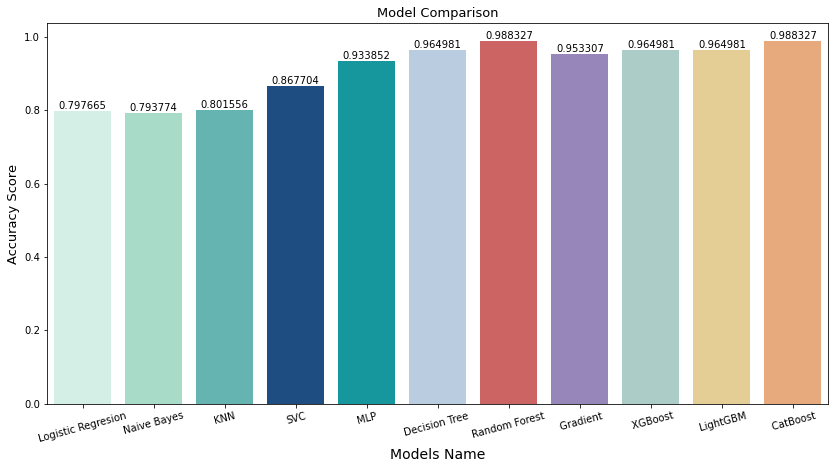

In [312]:
plt.figure(figsize=(14,7))
colors=sns.color_palette(["#CFF5E7","#A0E4CB","#59C1BD","#0D4C92","#00ABB3","#B4CDE6","#DD5353","#937DC2","#A7D2CB","#F2D388","#F7A76C","#319DA0"])
ax=sns.barplot(data=models,x="Model",y="Accuracy Score",palette=colors)
ax.set_xticklabels(ax.get_xticklabels(),rotation=15)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Model Comparison",size=13)
plt.xlabel("Models Name",size=14)
plt.ylabel("Accuracy Score",size=13)
plt.show()